In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
%run import_data.ipynb

Dataset books.csv loaded successfully
isbn column dropped, isbn13 column kept
Language codes eng, en-US, en-GB, en-CA unified to 'en'
Missing publication dates filled in
2nd (large) dataset is being loaded...
Pandas dataframes (books_df, books_big, users, ratings) loaded successfully
Columns renamed and dates converted to dtype: datetime
replacing author fetching errors and missing values with NA
dataframe books copied from books_big for ease of use
replacing genre fetching errors with NA
missing values in books dataframe turned into pd.NA for more accurate analysis
Ready to go!


In [ ]:
# Running the repo files for the very first time? use this instead:
# %run import_data_first_time.ipynb

In [4]:
users[users['age'] >= 100]


,user_id,location,age
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
3084,3085,"zürich, switzerland, switzerland",104.0
3210,3211,"le mesnil saint denis, yvelines, france",119.0
...,...,...,...
276047,276048,"wien, wien, austria",127.0
276352,276353,"hillsdale, new york, usa",104.0
277107,277108,"quinto, ticino, switzerland",104.0
277503,277504,"san diego, california, usa",103.0


In [5]:
users.nunique()

user_id     278858
location     57339
age            165
dtype: int64

In [6]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
users.duplicated().sum()

0

In [8]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [9]:
users.describe()

,user_id,age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [10]:
# Checking duplicates on client id
users_duplicates = users.duplicated(subset = 'user_id', keep = False)
users[users_duplicates].head()


,user_id,location,age


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
ratings.head(10)

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,0600570967,6
8,276744,038550120X,7
9,276745,342310538,10


In [13]:
ratings.duplicated().sum()

0

In [14]:
ratings.isnull().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [15]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,1149780.0,140386.395126,80562.277719,2.0,70345.0,141010.0,211028.0,278854.0
book_rating,1149780.0,2.866950,3.854184,0.0,0.0,0.0,7.0,10.0


In [16]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226493 entries, 0 to 226492
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 226493 non-null  object
 1   book_title           226493 non-null  object
 2   book_author          226322 non-null  object
 3   year_of_publication  226493 non-null  int64 
 4   publisher            226493 non-null  object
 5   image_url_s          226493 non-null  object
 6   image_url_m          226493 non-null  object
 7   image_url_l          226493 non-null  object
 8   genre                195719 non-null  object
dtypes: int64(1), object(8)
memory usage: 15.6+ MB


In [17]:
books.nunique()

isbn                   226493
book_title             202709
book_author             86663
year_of_publication       104
publisher               14574
image_url_s            226264
image_url_m            226264
image_url_l            226264
genre                  135634
dtype: int64

In [18]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
0,590085417,Heidi,Johanna Spyri,2021,Scholastic,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...,"Johanna Spyri, Shirley Temple, Movie tie-in, C..."
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,NaN
2,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch & Lombard,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,American Fantasy poetry
3,307124533,Owl's Amazing but True No. 2,Owl Magazine,2012,Golden Books,http://images.amazon.com/images/P/0307124533.0...,http://images.amazon.com/images/P/0307124533.0...,http://images.amazon.com/images/P/0307124533.0...,NaN
4,380816792,A Rose in Winter,Kathleen E. Woodiwiss,2011,Harper Mass Market Paperbacks,http://images.amazon.com/images/P/0380816792.0...,http://images.amazon.com/images/P/0380816792.0...,http://images.amazon.com/images/P/0380816792.0...,"Fiction, Historical Fiction, Romance, Fiction,..."


In [19]:
books.duplicated().sum()

0

In [20]:
books.isnull().sum()

isbn                       0
book_title                 0
book_author              171
year_of_publication        0
publisher                  0
image_url_s                0
image_url_m                0
image_url_l                0
genre                  30774
dtype: int64

In [21]:
books.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_publication,226493.0,1993.548105,8.496009,1806.0,1989.0,1996.0,2000.0,2021.0


In [22]:
users = users.fillna('unknown')

In [23]:
users["age"]

0         unknown
1            18.0
2         unknown
3            17.0
4         unknown
           ...   
278853    unknown
278854       50.0
278855    unknown
278856    unknown
278857    unknown
Name: age, Length: 278858, dtype: object

In [24]:
books = books.fillna('unknown')

In [25]:
books.isna().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
image_url_s            0
image_url_m            0
image_url_l            0
genre                  0
dtype: int64

In [26]:
books['isbn'].duplicated().sum()

0

In [27]:
users

,user_id,location,age
0,1,"nyc, new york, usa",unknown
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",unknown
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",unknown
...,...,...,...
278853,278854,"portland, oregon, usa",unknown
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",unknown
278856,278857,"knoxville, tennessee, usa",unknown


In [28]:
ratings.sort_values(by="isbn",ascending=True)

,user_id,isbn,book_rating
750718,181817,0330299891,6
371986,89192,0330299891,0
371987,89192,0375404120,3
1112730,266865,0375404120,0
371988,89192,0586045007,0
...,...,...,...
447770,107301,cn113107,0
1109374,266146,ooo7156103,7
353525,85250,§423350229,0
357163,86103,´3499128624,8


In [29]:
ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [30]:
ratings.sort_values(by='book_rating', ascending=True)

,user_id,isbn,book_rating
0,276725,034545104X,0
687400,167471,0806515082,0
687402,167471,0806958855,0
687403,167471,080698323X,0
687407,167471,0811841405,0
...,...,...,...
272376,63625,0316168815,10
222656,52044,0486287297,10
272375,63625,0312147015,10
406256,98391,0312252617,10


In [31]:
books.sort_values(by='year_of_publication', ascending=True)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
226492,781228956,"Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806,Reprint Services Corp,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,http://images.amazon.com/images/P/0781228956.0...,unknown
226490,B0000VZEFK,Is That a Gun in Your Pocket?: Women's Experie...,Rachel Abramowitz,1900,Random House,http://images.amazon.com/images/P/B0000VZEFK.0...,http://images.amazon.com/images/P/B0000VZEFK.0...,http://images.amazon.com/images/P/B0000VZEFK.0...,unknown
226491,1551103982,The Cycling Adventures of Coconut Head: A Nort...,Ted Schredd,1900,Graphic Arts Center Pub Co,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...,http://images.amazon.com/images/P/1551103982.0...,"Bicycle touring, Description and travel, Journ..."
226489,671493310,MOST SJ PERELMAN P,S.J. Perelman,1901,Fireside,http://images.amazon.com/images/P/0671493310.0...,http://images.amazon.com/images/P/0671493310.0...,http://images.amazon.com/images/P/0671493310.0...,"American Short stories, American wit and humor..."
226488,671068350,BASIC WRTNG RUSL,Bertrand Russell Russell,1901,Simon & Schuster,http://images.amazon.com/images/P/0671068350.0...,http://images.amazon.com/images/P/0671068350.0...,http://images.amazon.com/images/P/0671068350.0...,unknown
...,...,...,...,...,...,...,...,...,...
4,380816792,A Rose in Winter,Kathleen E. Woodiwiss,2011,Harper Mass Market Paperbacks,http://images.amazon.com/images/P/0380816792.0...,http://images.amazon.com/images/P/0380816792.0...,http://images.amazon.com/images/P/0380816792.0...,"Fiction, Historical Fiction, Romance, Fiction,..."
3,307124533,Owl's Amazing but True No. 2,Owl Magazine,2012,Golden Books,http://images.amazon.com/images/P/0307124533.0...,http://images.amazon.com/images/P/0307124533.0...,http://images.amazon.com/images/P/0307124533.0...,unknown
2,068107468X,Edgar Allen Poe Collected Poems,Edgar Allan Poe,2020,Bausch & Lombard,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,http://images.amazon.com/images/P/068107468X.0...,American Fantasy poetry
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,unknown


In [32]:
books.year_of_publication.isna().sum()

0

In [33]:
books.year_of_publication[books['year_of_publication'] == ''].count()

0

[Text(0.5, 0, 'Book Rating'), Text(0, 0.5, 'Number of Books')]

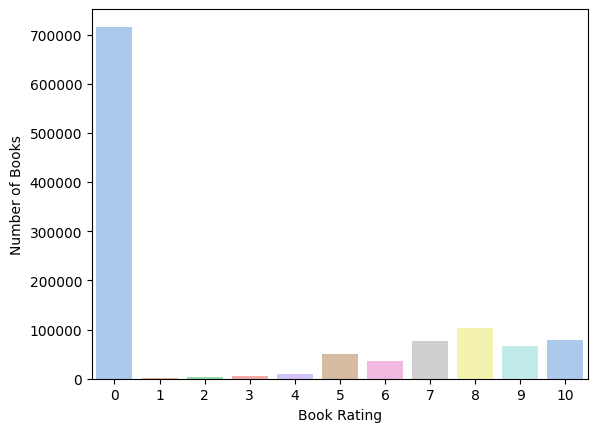

In [34]:
ax=sns.countplot(data=ratings, x= "book_rating", hue='book_rating', legend=False, palette='pastel')
ax.set(xlabel='Book Rating', ylabel='Number of Books')

In [35]:
# Filter the DataFrame to include only rows where 'book_rating' is 0
zero_rating_books = ratings[ratings['book_rating'] == 0]

# Print the filtered DataFrame
print(zero_rating_books)

# Optionally, count how many times 0 appears
zero_rating_count = zero_rating_books['book_rating'].value_counts()
print(f"Number of books with a rating of 0: {zero_rating_count[0]}")

         user_id        isbn  book_rating
0         276725  034545104X            0
2         276727  0446520802            0
5         276733  2080674722            0
10        276746  0425115801            0
11        276746  0449006522            0
...          ...         ...          ...
1149769   276704  059032120X            0
1149770   276704  0679752714            0
1149772   276704  080410526X            0
1149774   276704  0876044011            0
1149776   276706  0679447156            0

[716109 rows x 3 columns]
Number of books with a rating of 0: 716109


Text(0.5, 1.0, 'Top 20 Books')

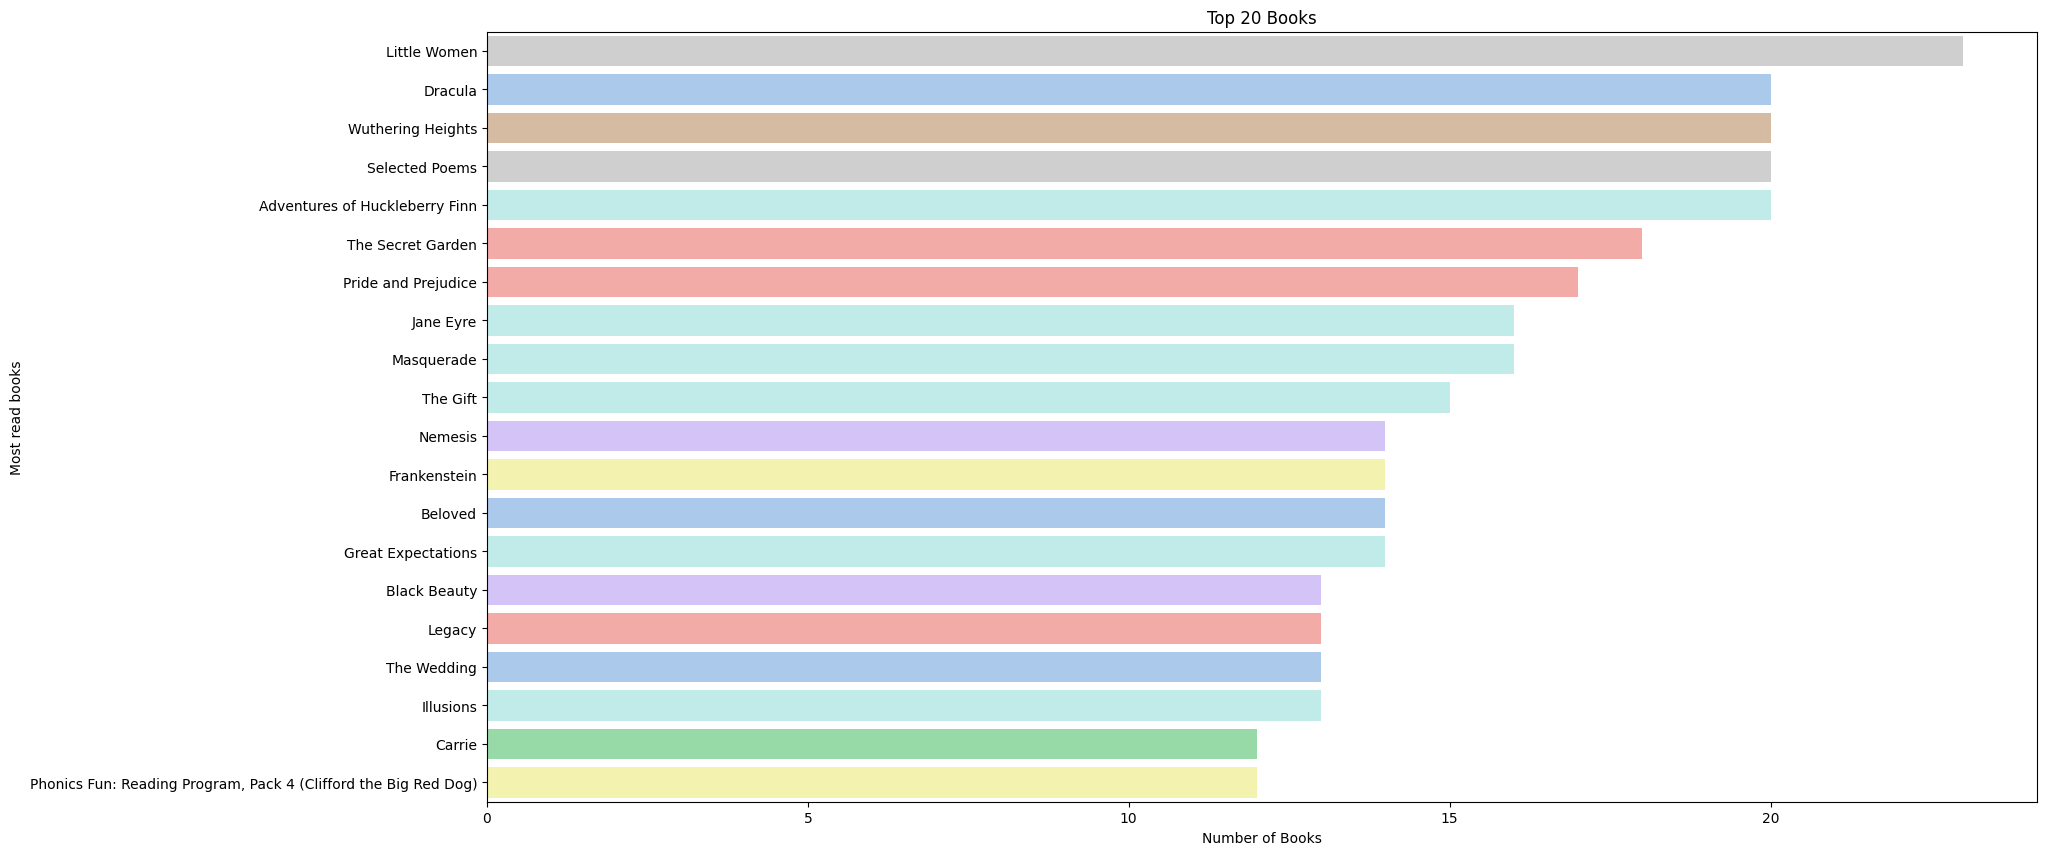

In [36]:
plt.figure(figsize=(20,10))
ax1 = sns.countplot(y='book_title', data=books, order=pd.Series(books['book_title']).value_counts().iloc[:20].index, hue='book_title', legend=False, palette="pastel")
ax1.set(xlabel='Number of Books', ylabel='Most read books')
plt.title('Top 20 Books')

Text(0.5, 1.0, 'Top 20 Authors')

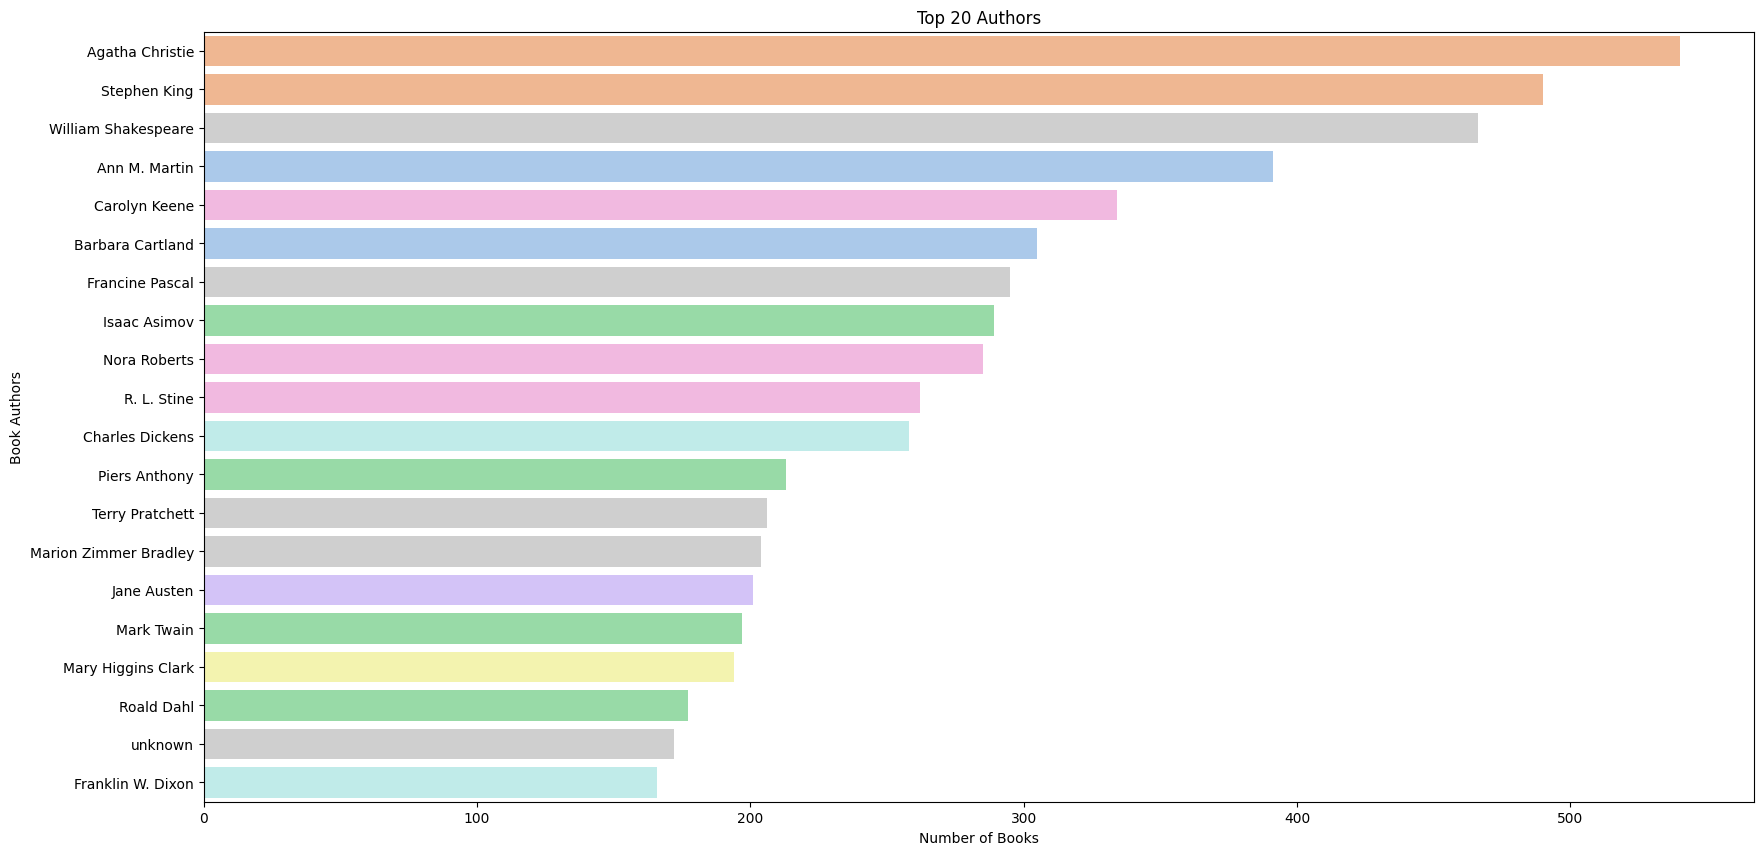

In [37]:
plt.figure(figsize=(20,10))
ax1=sns.countplot(y='book_author', data=books, order=pd.Series(books['book_author']).value_counts().iloc[:20].index, hue='book_author', legend=False, palette="pastel")
ax1.set(xlabel='Number of Books', ylabel='Book Authors')
plt.title('Top 20 Authors')

In [38]:
order=pd.Series(books['book_author']).value_counts().iloc[:20]
order.head(20)

book_author
Agatha Christie          540
Stephen King             490
William Shakespeare      466
Ann M. Martin            391
Carolyn Keene            334
Barbara Cartland         305
Francine Pascal          295
Isaac Asimov             289
Nora Roberts             285
R. L. Stine              262
Charles Dickens          258
Piers Anthony            213
Terry Pratchett          206
Marion Zimmer Bradley    204
Jane Austen              201
Mark Twain               197
Mary Higgins Clark       194
Roald Dahl               177
unknown                  172
Franklin W. Dixon        166
Name: count, dtype: int64

In [39]:
books[books['isbn'] == '738702943'] # Example ISBN with missing author information

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
5530,738702943,Llewellyn's 2003 Wicca Almanac: Spring 2003 to...,unknown,2003,Llewellyn Publications,http://images.amazon.com/images/P/0738702943.0...,http://images.amazon.com/images/P/0738702943.0...,http://images.amazon.com/images/P/0738702943.0...,Witchcraft


Text(0.5, 1.0, 'Top 20 Publishers')

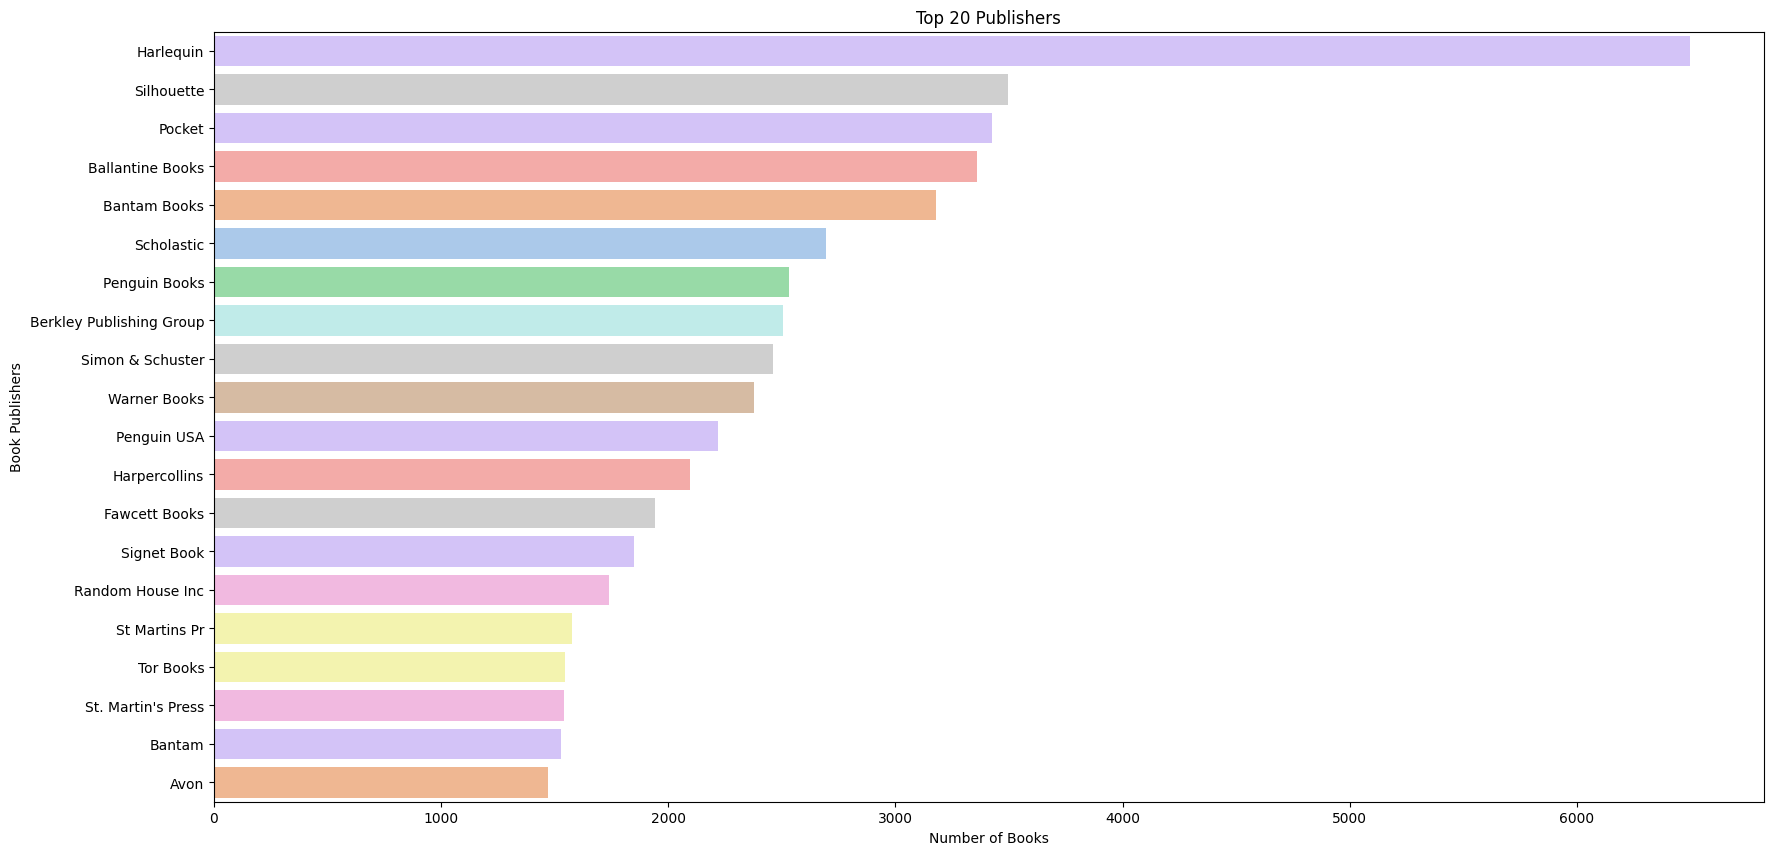

In [40]:
plt.figure(figsize=(20,10))
ax2=sns.countplot(y='publisher', data=books, order=pd.Series(books['publisher']).value_counts().iloc[:20].index, hue='publisher', legend=False, palette="pastel")
ax2.set(xlabel='Number of Books', ylabel='Book Publishers')
plt.title('Top 20 Publishers')

Text(0.5, 1.0, 'Top 20 Locations')

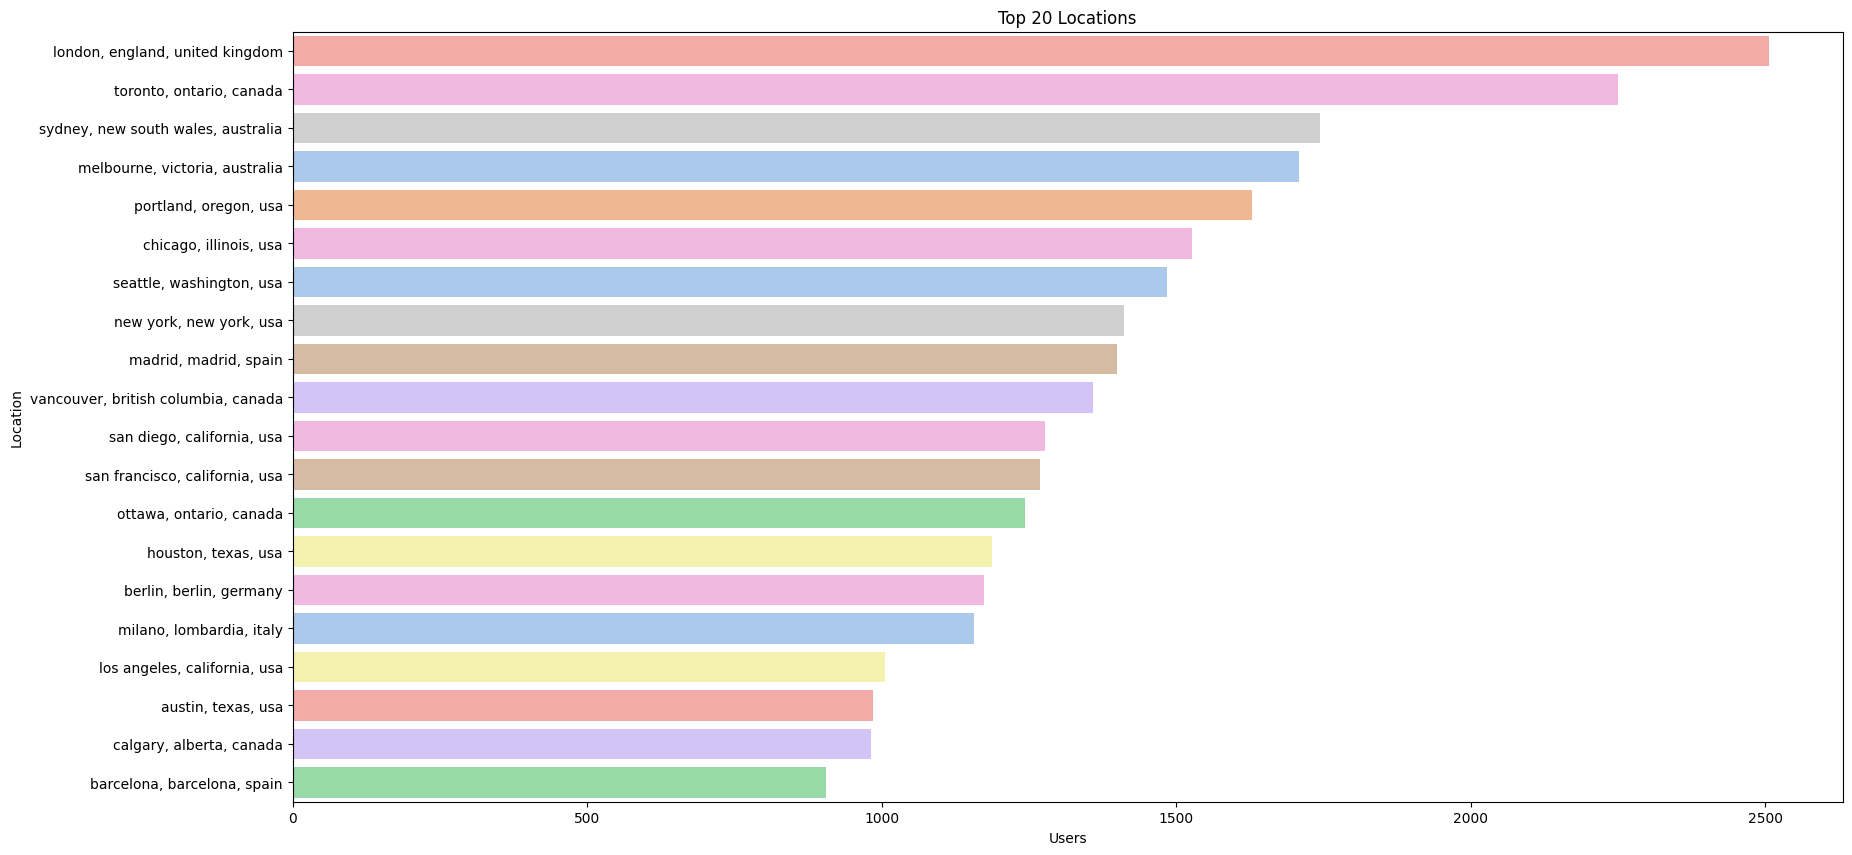

In [41]:
plt.figure(figsize=(20,10))
ax3=sns.countplot(y='location', data=users, order=pd.Series(users['location']).value_counts().iloc[:20].index, hue='location', legend=False, palette="pastel")
ax3.set(xlabel='Users', ylabel='Location')
plt.title('Top 20 Locations')

In [42]:
pd.Series(books['year_of_publication']).value_counts(ascending=True)

year_of_publication
2021        1
1904        1
1906        1
1908        1
1910        1
        ...  
1998    13405
2000    14756
1999    14833
2001    15056
2002    15334
Name: count, Length: 104, dtype: int64

In [43]:
# Calculate value counts and sort in ascending order
year_count = pd.Series(books['year_of_publication']).value_counts(ascending=True)


# Filter to show only years with counts less than 5
filtered_year_count = year_count[year_count < 5]
print(filtered_year_count.head())
print(filtered_year_count.tail())

year_of_publication
2021    1
1904    1
1906    1
1908    1
1910    1
Name: count, dtype: int64
year_of_publication
1944    2
1935    3
1933    3
1931    3
1932    4
Name: count, dtype: int64


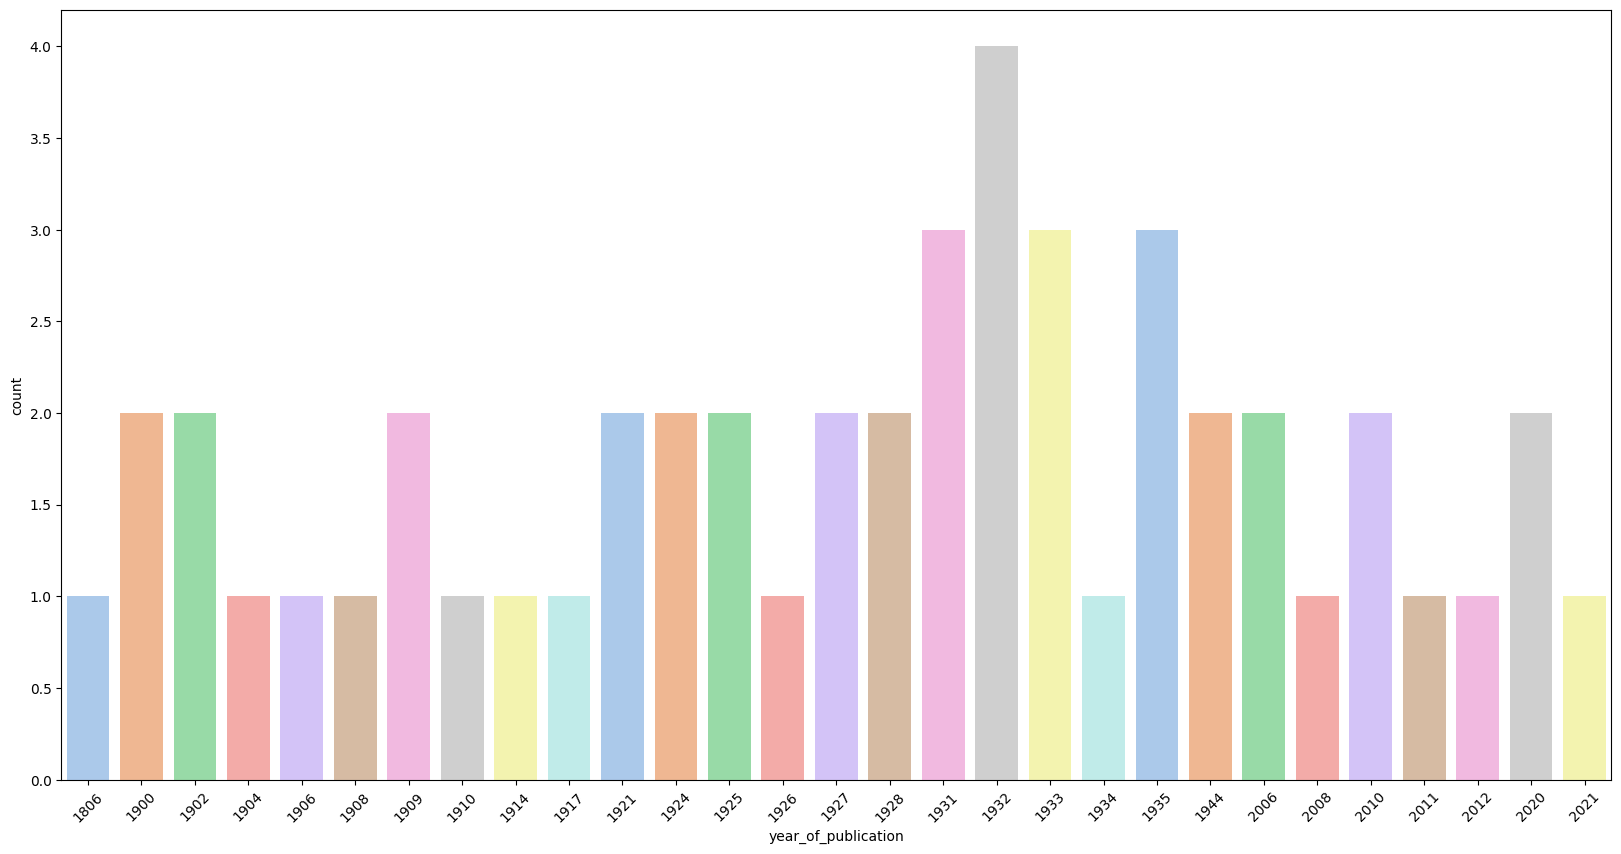

In [44]:
#Years with less than 5 books
# Convert the filtered series to a DataFrame for easier plotting
filtered_year_count_df = filtered_year_count.reset_index()
filtered_year_count_df.columns = ['year_of_publication', 'count']

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a bar plot
sns.barplot(data=filtered_year_count_df, x='year_of_publication', y='count', hue='year_of_publication', legend=False, palette='pastel')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [45]:
books.year_of_publication.describe()

count    226493.000000
mean       1993.548105
std           8.496009
min        1806.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2021.000000
Name: year_of_publication, dtype: float64

In [46]:
books['year_of_publication'].unique()

array([2021, 2020, 2012, 2011, 2010, 2008, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980,
       1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969,
       1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958,
       1957, 1956, 1955, 1954, 1953, 1952, 1951, 1950, 1949, 1948, 1947,
       1946, 1945, 1944, 1943, 1942, 1941, 1940, 1939, 1938, 1937, 1936,
       1935, 1934, 1933, 1932, 1931, 1930, 1929, 1928, 1927, 1926, 1925,
       1924, 1923, 1921, 1920, 1917, 1914, 1911, 1910, 1909, 1908, 1906,
       1904, 1902, 1901, 1900, 1806])

In [47]:
books['year_of_publication'].isna().sum()

0

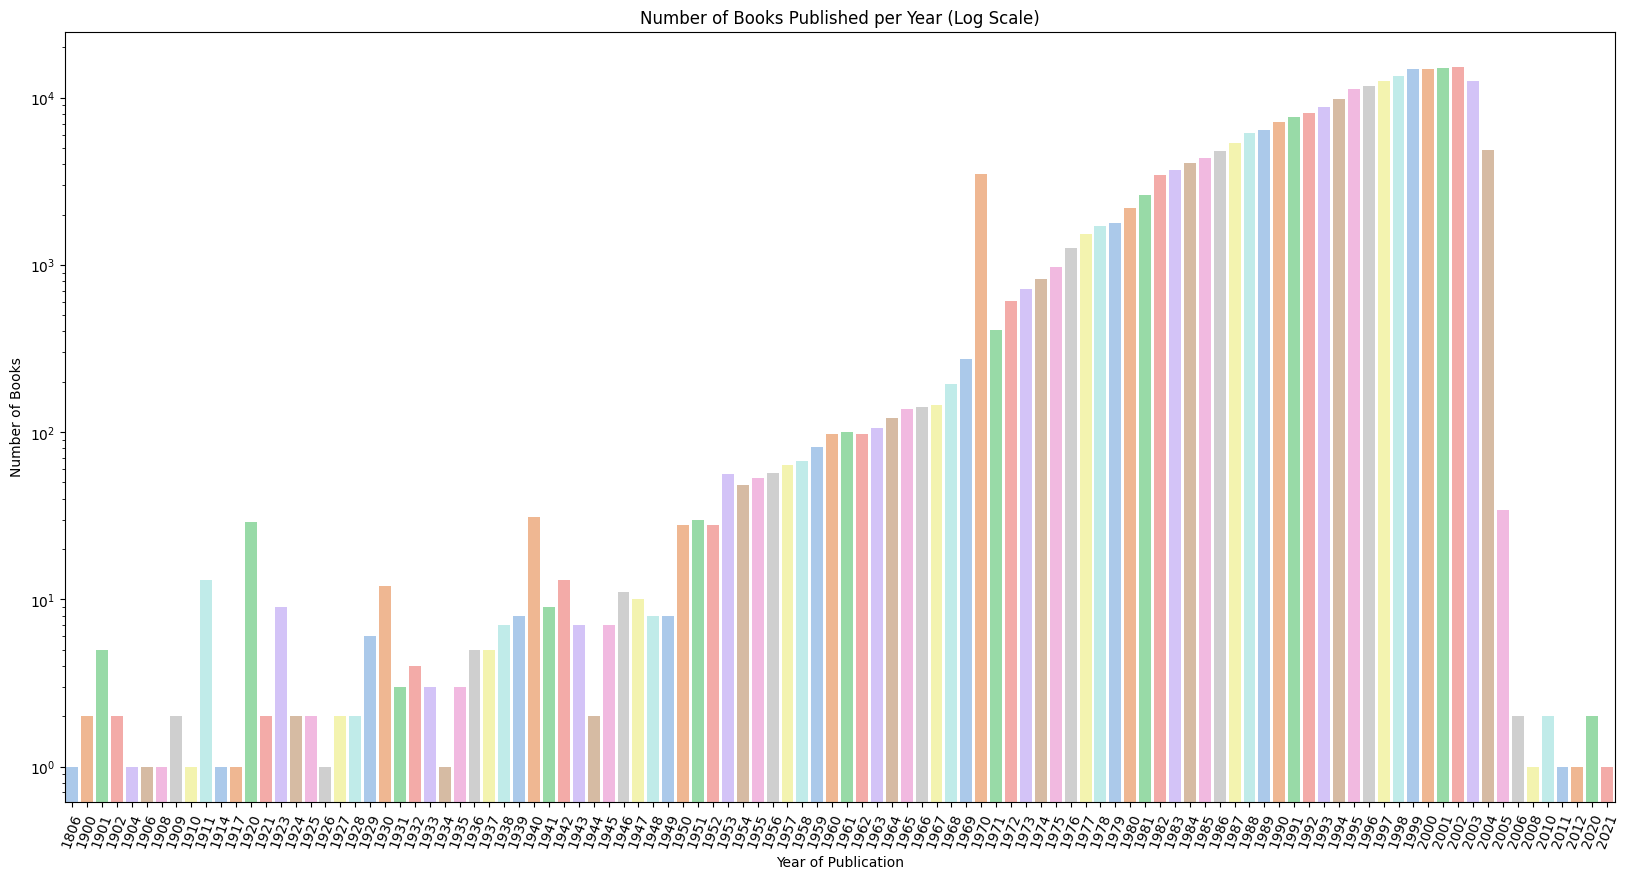

In [48]:
# Sort the DataFrame by 'year_of_publication' in ascending order
books_sorted = books.sort_values(by='year_of_publication', ascending=True)
# Set the figure size before creating the plot
plt.figure(figsize=(20, 10))
ax = sns.countplot(data=books_sorted, x= "year_of_publication", hue="year_of_publication", legend=False, palette='pastel')
ax.set_yscale("log")
ax.set(xlabel="Year of Publication", ylabel="Number of Books")
plt.title('Number of Books Published per Year (Log Scale)')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=70);

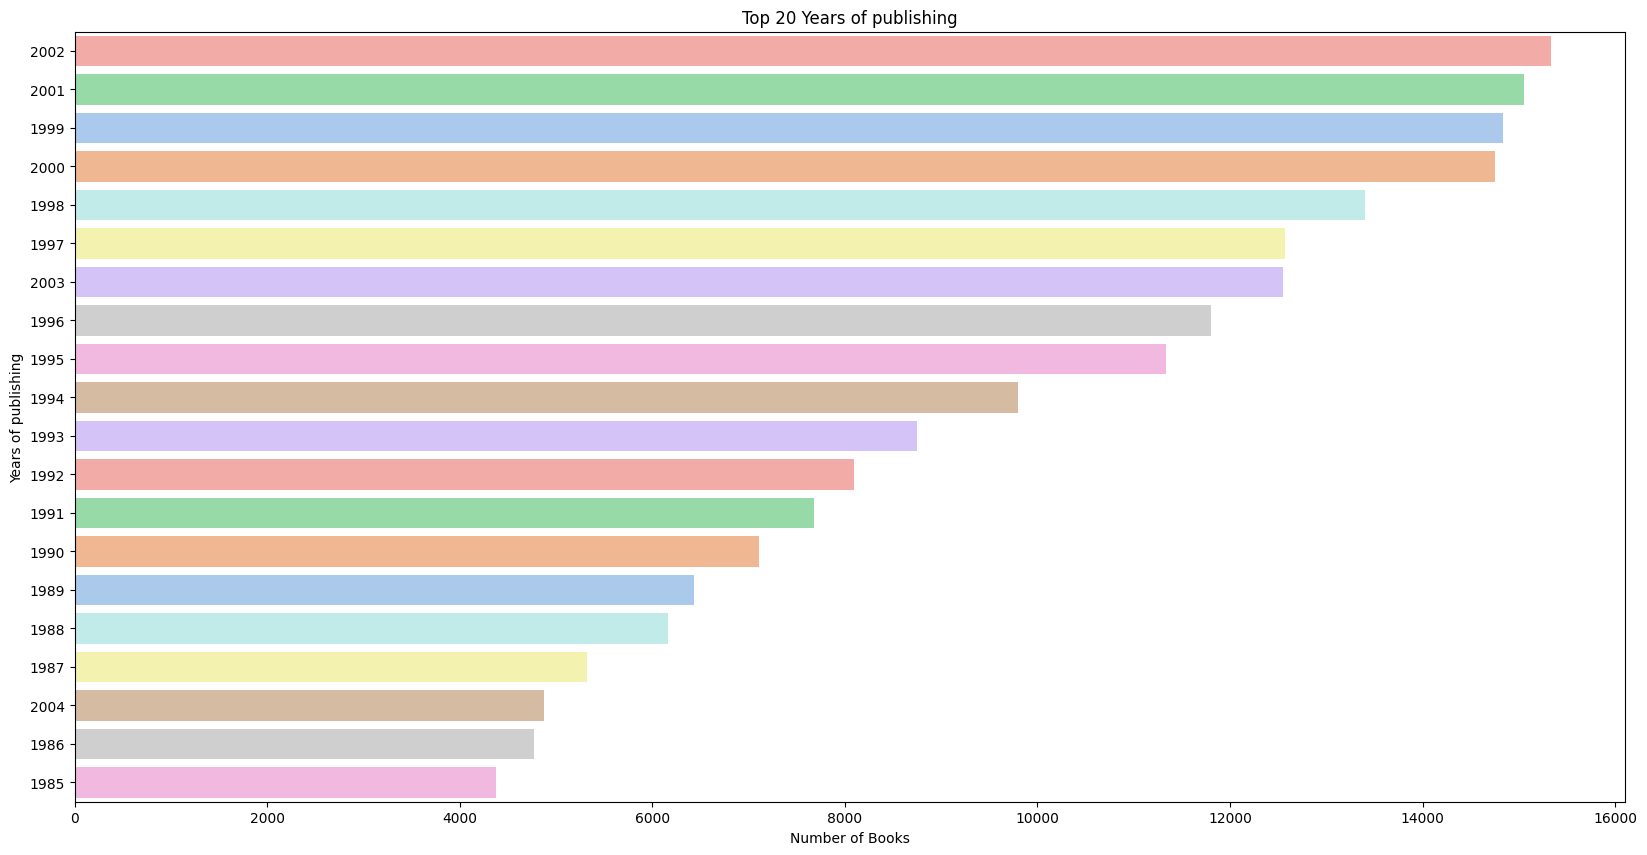

In [49]:
plt.figure(figsize=(20,10))
ax2=sns.countplot(y='year_of_publication',data=books,order=pd.Series(books['year_of_publication']).value_counts().iloc[:20].index, hue='year_of_publication', legend=False, palette="pastel")
ax2.set(xlabel='Number of Books', ylabel='Years of publishing')
plt.title('Top 20 Years of publishing');

In [50]:
books.loc[books['year_of_publication'] == '2007',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre


In [51]:
books.sort_values(by="isbn",ascending=True)

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre
141523,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993,HarperCollins Publishers,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,http://images.amazon.com/images/P/000104687X.0...,unknown
129318,000104799X,Monk's-hood,Ellis Peters,1994,HarperCollins Publishers,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,http://images.amazon.com/images/P/000104799X.0...,"Herbalists, Monks, Fiction, Brother Cadfael (F..."
226313,000123207X,Paddington's Birthday Party,Michael Bond,1942,HarperCollins Publishers,http://images.amazon.com/images/P/000123207X.0...,http://images.amazon.com/images/P/000123207X.0...,http://images.amazon.com/images/P/000123207X.0...,"Bears, Birthdays, Fiction"
197998,000171421X,It's Not Easy Being a Bunny (A Beginner Book),Marilyn Sadler,1984,HarperCollins Publishers,http://images.amazon.com/images/P/000171421X.0...,http://images.amazon.com/images/P/000171421X.0...,http://images.amazon.com/images/P/000171421X.0...,unknown
183533,000184251X,February's Road,John Verney,1987,HarperCollins Publishers,http://images.amazon.com/images/P/000184251X.0...,http://images.amazon.com/images/P/000184251X.0...,http://images.amazon.com/images/P/000184251X.0...,Children's fiction
...,...,...,...,...,...,...,...,...,...
44311,B0001PBXMS,"Love, etc.",Julian Barnes,2001,Knopf,http://images.amazon.com/images/P/B0001PBXMS.0...,http://images.amazon.com/images/P/B0001PBXMS.0...,http://images.amazon.com/images/P/B0001PBXMS.0...,unknown
141484,B0001PIOX4,Fahrenheit 451,Ray Bradbury,1993,Simon & Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,unknown
44310,B000234N3A,Fraud,David Rakoff,2001,Doubleday,http://images.amazon.com/images/P/B000234N3A.0...,http://images.amazon.com/images/P/B000234N3A.0...,http://images.amazon.com/images/P/B000234N3A.0...,unknown
37820,B000234N76,Falling Angels,Tracy Chevalier,2001,E P Dutton,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,http://images.amazon.com/images/P/B000234N76.0...,unknown


In [52]:
books.nunique()['book_author']

86663

In [53]:
len(ratings['isbn'].unique())

340556

In [54]:
len(books['isbn'].unique())

226493

In [55]:
same_isbn = books['isbn'].isin(ratings['isbn']).sum()
same_isbn

59938

In [56]:
len(ratings['user_id'].unique())

105283

In [57]:
len(users['user_id'].unique())

278858

In [58]:
same_userid=users['user_id'].isin(ratings['user_id']).sum()
same_userid

105283

In [59]:
# Perform a left join on the 'isbn' column
booksratings = pd.merge(books, ratings, on='isbn', how='left')

# Display the first few rows of the merged DataFrame
booksratings.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,genre,user_id,book_rating
0,590085417,Heidi,Johanna Spyri,2021,Scholastic,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...,http://images.amazon.com/images/P/0590085417.0...,"Johanna Spyri, Shirley Temple, Movie tie-in, C...",NaN,NaN
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,unknown,16634.0,0.0
2,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,unknown,87141.0,0.0
3,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,unknown,169736.0,7.0
4,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,http://images.amazon.com/images/P/068160204X.0...,unknown,208406.0,0.0


In [60]:
booksratings.drop(["image_url_s", "image_url_m", "image_url_l" ], axis=1, inplace=True)

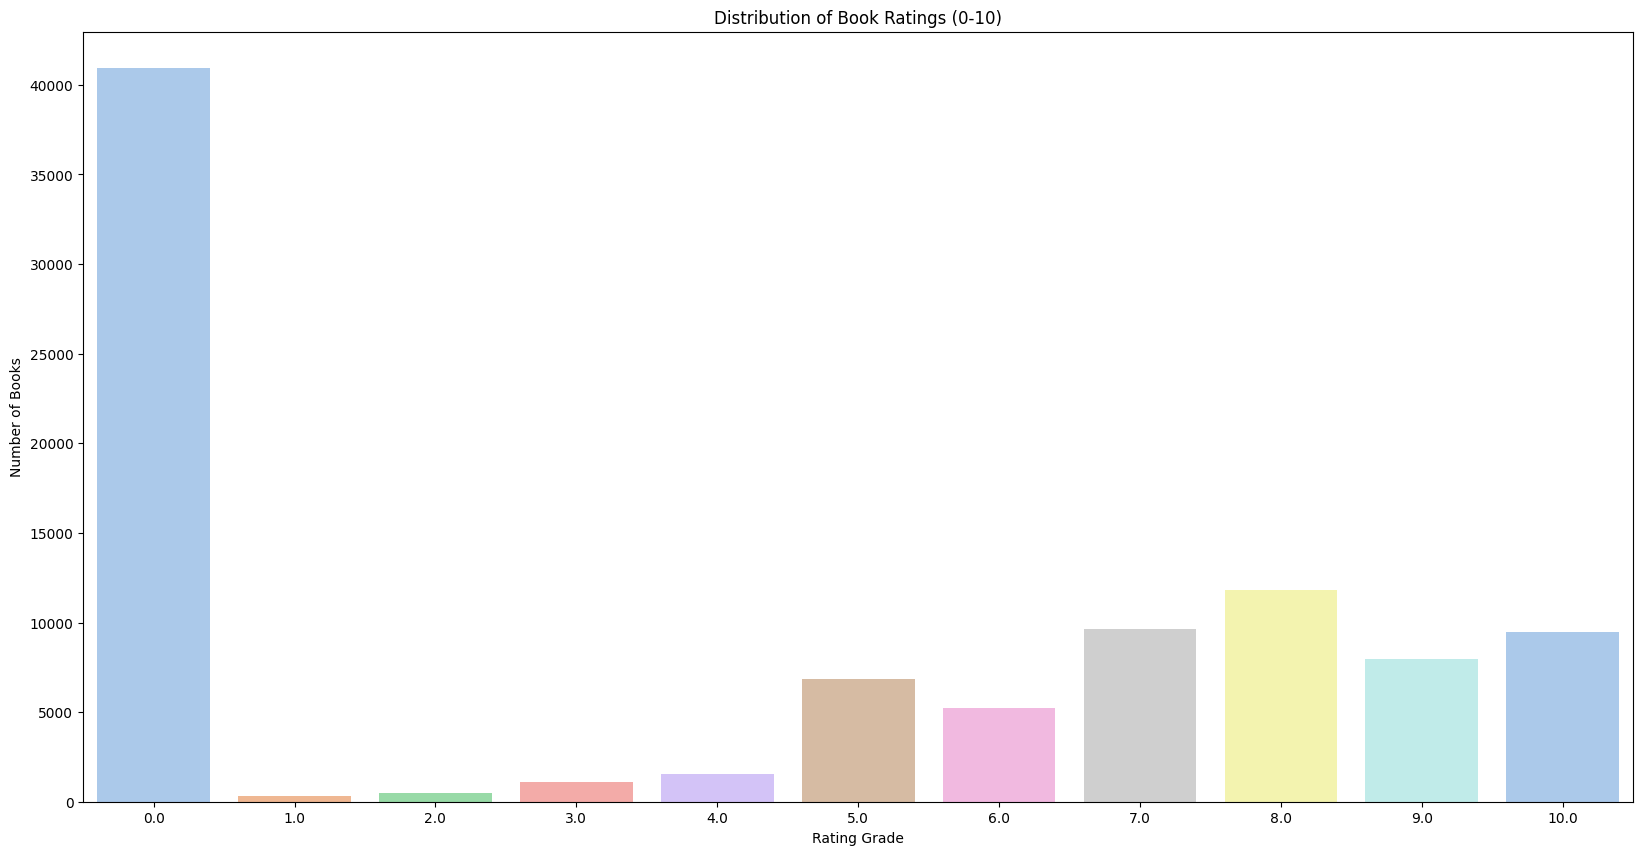

In [61]:
# Group by 'isbn' and 'book_rating' and count the number of occurrences
booksratings_grouped = booksratings.groupby(["isbn", 'book_rating']).count().reset_index()

# Set the figure size before creating the plot
plt.figure(figsize=(20, 10))

# Create the bar plot
ax2 = sns.countplot(data=booksratings_grouped, x="book_rating",hue='book_rating', legend=False, palette='pastel');
ax2.set(ylabel='Number of Books', xlabel='Rating Grade')
plt.title('Distribution of Book Ratings (0-10)');

In [62]:
# Perform a left join on the 'isbn' column
all = pd.merge(booksratings, users, on='user_id', how='left')
all.head()

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age
0,590085417,Heidi,Johanna Spyri,2021,Scholastic,"Johanna Spyri, Shirley Temple, Movie tie-in, C...",NaN,NaN,NaN,NaN
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,16634.0,0.0,"little rock, arkansas, usa",42.0
2,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,87141.0,0.0,"huntington beach, california, usa",unknown
3,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,169736.0,7.0,"minneapolis, minnesota, usa",34.0
4,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,208406.0,0.0,"kansas city, missouri, usa",30.0


In [63]:
print(f"Shape of booksratings: {booksratings.shape}")
print(f"Shape of users: {users.shape}")
print(f"Shape of merged DataFrame (all): {all.shape}")

Shape of booksratings: (350155, 8)
Shape of users: (278858, 3)
Shape of merged DataFrame (all): (350155, 10)


In [64]:
missing_users = all[all['user_id'].isna()]

In [65]:
missing_users

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age
0,590085417,Heidi,Johanna Spyri,2021,Scholastic,"Johanna Spyri, Shirley Temple, Movie tie-in, C...",NaN,NaN,NaN,NaN
8,307124533,Owl's Amazing but True No. 2,Owl Magazine,2012,Golden Books,unknown,NaN,NaN,NaN,NaN
9,380816792,A Rose in Winter,Kathleen E. Woodiwiss,2011,Harper Mass Market Paperbacks,"Fiction, Historical Fiction, Romance, Fiction,...",NaN,NaN,NaN,NaN
10,743474198,Heartbreaker,Julie Garwood,2010,Pocket,"Detective and mystery stories, Open Library St...",NaN,NaN,NaN,NaN
11,743457226,Deep Waters,Jayne Ann Krentz,2010,Pocket,unknown,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
350147,671729012,THURBER COUNTRY P,James Thurber,1901,Touchstone,"American Humorous stories, Humorismo estadouni...",NaN,NaN,NaN,NaN
350148,671407104,LAST TEMP CHRISTCL,Nikos Kazantzakis,1901,Simon & Schuster,"Fiction, Bible, Translations into English, Mod...",NaN,NaN,NaN,NaN
350149,671068350,BASIC WRTNG RUSL,Bertrand Russell Russell,1901,Simon & Schuster,unknown,NaN,NaN,NaN,NaN
350150,671493310,MOST SJ PERELMAN P,S.J. Perelman,1901,Fireside,"American Short stories, American wit and humor...",NaN,NaN,NaN,NaN


In [66]:
print(all.isna().sum())

isbn                        0
book_title                  0
book_author                 0
year_of_publication         0
publisher                   0
genre                       0
user_id                166555
book_rating            166555
location               166555
age                    166555
dtype: int64


In [67]:
# Drop rows with any NaN values in any column
all_cleaned = all.dropna()

# Alternatively, drop rows with NaN values only in specific columns
# all_cleaned = all.dropna(subset=['column1', 'column2'])

# Check the shape of the cleaned DataFrame
print(f"Shape before dropping NaNs: {all.shape}")
print(f"Shape after dropping NaNs: {all_cleaned.shape}")

# Display the first few rows of the cleaned DataFrame
print(all_cleaned.head())

Shape before dropping NaNs: (350155, 10)
Shape after dropping NaNs: (183600, 10)
         isbn  book_title   book_author  year_of_publication  \
1  068160204X  The Royals  Kitty Kelley                 2020   
2  068160204X  The Royals  Kitty Kelley                 2020   
3  068160204X  The Royals  Kitty Kelley                 2020   
4  068160204X  The Royals  Kitty Kelley                 2020   
5  068160204X  The Royals  Kitty Kelley                 2020   

          publisher    genre   user_id  book_rating  \
1  Bausch & Lombard  unknown   16634.0          0.0   
2  Bausch & Lombard  unknown   87141.0          0.0   
3  Bausch & Lombard  unknown  169736.0          7.0   
4  Bausch & Lombard  unknown  208406.0          0.0   
5  Bausch & Lombard  unknown  230496.0          0.0   

                            location      age  
1         little rock, arkansas, usa     42.0  
2  huntington beach, california, usa  unknown  
3        minneapolis, minnesota, usa     34.0  
4         k

In [68]:
print(f"Shape of merged DataFrame (all): {all_cleaned.shape}")

Shape of merged DataFrame (all): (183600, 10)


In [69]:
all_cleaned.head()

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,16634.0,0.0,"little rock, arkansas, usa",42.0
2,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,87141.0,0.0,"huntington beach, california, usa",unknown
3,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,169736.0,7.0,"minneapolis, minnesota, usa",34.0
4,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,208406.0,0.0,"kansas city, missouri, usa",30.0
5,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,230496.0,0.0,"simi valley, california, usa",34.0


In [70]:
missing_users = all_cleaned[all_cleaned['user_id'].isna()]
missing_users

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age


In [71]:
print(all_cleaned.isna().sum())

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
genre                  0
user_id                0
book_rating            0
location               0
age                    0
dtype: int64


In [72]:
all_cleaned[all_cleaned['book_rating'] == 0].shape 

(108146, 10)

In [73]:
print(all_cleaned['age'].isna().sum())

0


In [74]:
all_cleaned['age'].isna().sum()

0

In [75]:
# Step 1: Replace NaN values with 'unknown'
all_cleaned['age'] = all_cleaned['age'].fillna('Unknown')

# Step 2: Convert the 'age' column to numeric, coercing errors to NaN for non-numeric values like 'unknown'
all_cleaned['age_numeric'] = pd.to_numeric(all_cleaned['age'], errors='coerce')

# Step 3: Create age groups using the numeric age column, ignoring NaN values
bins = [-1, 12, 20, 50, 100, 250]
labels = ['Kid', 'Teenager', 'Adult', 'Mature', 'Super Mature']
all_cleaned['age_bins'] = pd.cut(all_cleaned['age_numeric'], bins=bins, labels=labels, right=False)

# Step 4: Handle 'unknown' explicitly
all_cleaned['age_bins'] = all_cleaned['age_bins'].astype(object)  # Ensure the bins are treated as object type (string)
all_cleaned['age_bins'][all_cleaned['age'] == 'unknown'] = 'unknown'

# Step 5: Convert the age_bins column to a categorical type with the desired order
all_cleaned['age_bins'] = pd.Categorical(all_cleaned['age_bins'], categories=labels + ['unknown'], ordered=True);

/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/2887890259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleaned['age'] = all_cleaned['age'].fillna('Unknown')
/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/2887890259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleaned['age_numeric'] = pd.to_numeric(all_cleaned['age'], errors='coerce')
/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/2887890259.py:10: SettingWithCopyWarning: 
A value is

In [82]:
all_cleaned["age"].unique()

array([42.0, 'unknown', 34.0, 30.0, 24.0, 101.0, 55.0, 38.0, 44.0, 28.0,
       47.0, 33.0, 39.0, 53.0, 57.0, 63.0, 29.0, 32.0, 25.0, 35.0, 23.0,
       31.0, 49.0, 51.0, 26.0, 37.0, 54.0, 58.0, 43.0, 56.0, 36.0, 52.0,
       40.0, 46.0, 27.0, 21.0, 41.0, 17.0, 18.0, 19.0, 50.0, 20.0, 15.0,
       1.0, 59.0, 45.0, 14.0, 103.0, 48.0, 22.0, 62.0, 104.0, 7.0, 72.0,
       16.0, 2.0, 73.0, 60.0, 68.0, 71.0, 64.0, 66.0, 116.0, 61.0, 136.0,
       9.0, 67.0, 3.0, 11.0, 100.0, 209.0, 12.0, 65.0, 239.0, 70.0, 75.0,
       148.0, 76.0, 13.0, 0.0, 74.0, 69.0, 78.0, 8.0, 81.0, 5.0, 82.0,
       80.0, 83.0, 90.0, 79.0, 201.0, 93.0, 140.0, 244.0, 127.0, 4.0,
       141.0, 10.0, 89.0, 92.0, 168.0, 77.0, 199.0, 6.0, 99.0, 84.0,
       128.0, 85.0, 124.0, 200.0, 97.0, 96.0, 204.0, 152.0, 95.0, 108.0,
       228.0, 133.0, 151.0, 220.0, 146.0, 157.0, 132.0, 105.0],
      dtype=object)

In [76]:
# Check the distribution of ages across the age bins
age_bins_distribution = all_cleaned['age_bins'].value_counts(sort=False)

# Display the counts for each age bin
print(age_bins_distribution)

age_bins
Kid                944
Teenager          6046
Adult           110775
Mature           19311
Super Mature       501
unknown          46023
Name: count, dtype: int64


/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/2458937589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_cleaned['age_bins'] = pd.Categorical(all_cleaned['age_bins'], categories=age_bins_order, ordered=True)
/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/2458937589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=all_cleaned, x='age_bins', palette='pastel', order=age_bins_order)


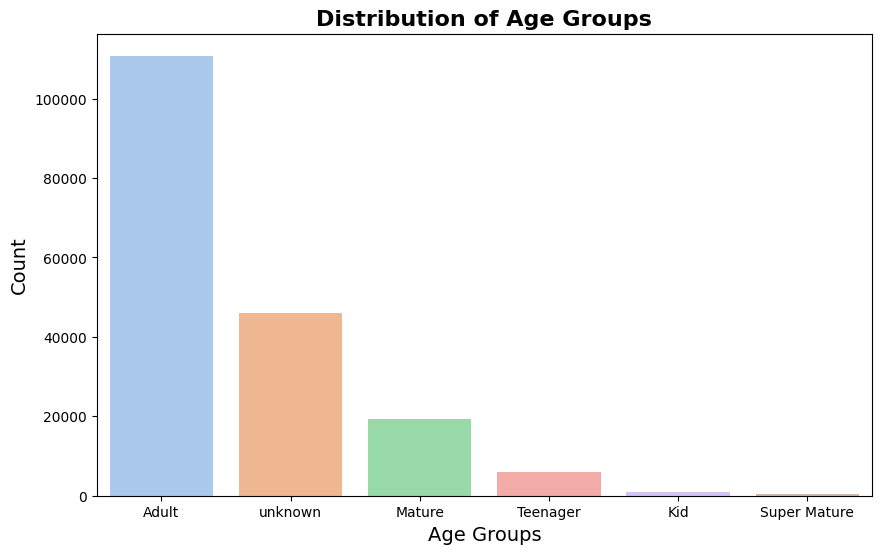

In [77]:
# Step 1: Calculate the frequency of each category in age_bins
age_bins_order = all_cleaned['age_bins'].value_counts().index

# Step 2: Convert age_bins to a categorical type with the new order
all_cleaned['age_bins'] = pd.Categorical(all_cleaned['age_bins'], categories=age_bins_order, ordered=True)

# Step 3: Plot the data
plt.figure(figsize=(10, 6))

# Create a count plot for the age_bins with descending order
sns.countplot(data=all_cleaned, x='age_bins', palette='pastel', order=age_bins_order)

# Set the title and labels
plt.title('Distribution of Age Groups', fontsize=16, fontweight='bold')
plt.xlabel('Age Groups', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the plot
plt.show()

In [78]:
import re

In [79]:
def clean_text_column(df, column_name):
    """
    Clean a specified text column in the DataFrame by:
    1. Removing leading numbers in the title.
    2. Removing special characters.
    3. Converting text to lowercase.
    4. Replacing multiple whitespace characters with a single space.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column.
    - column_name (str): The name of the column to be cleaned.

    Returns:
    - pd.DataFrame: The DataFrame with the specified column updated.
    """
    # Remove leading numbers followed by a space
    df.loc[:, f"mod_{column_name}"] = df[column_name].str.replace(r'^\d+\s+', '', regex=True)
    
    # Remove special characters
    df.loc[:, f"mod_{column_name}"] = df[f"mod_{column_name}"].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)
    
    # Convert to lowercase
    df.loc[:, f"mod_{column_name}"] = df[f"mod_{column_name}"].str.lower()
    
    # Replace multiple spaces with a single space
    df.loc[:, f"mod_{column_name}"] = df[f"mod_{column_name}"].str.replace(r'\s+', ' ', regex=True).str.strip()
    
    return df

In [80]:
clean_text_column(all_cleaned, 'book_author');
clean_text_column(all_cleaned, 'book_title');
clean_text_column(all_cleaned, 'publisher');

/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/61705075.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"mod_{column_name}"] = df[column_name].str.replace(r'^\d+\s+', '', regex=True)
/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/61705075.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, f"mod_{column_name}"] = df[column_name].str.replace(r'^\d+\s+', '', regex=True)
/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/61705075.py:1

In [81]:
all_cleaned.head()

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,16634.0,0.0,"little rock, arkansas, usa",42.0,42.0,Adult,kitty kelley,the royals,bausch lombard
2,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,87141.0,0.0,"huntington beach, california, usa",unknown,NaN,unknown,kitty kelley,the royals,bausch lombard
3,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,169736.0,7.0,"minneapolis, minnesota, usa",34.0,34.0,Adult,kitty kelley,the royals,bausch lombard
4,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,208406.0,0.0,"kansas city, missouri, usa",30.0,30.0,Adult,kitty kelley,the royals,bausch lombard
5,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,230496.0,0.0,"simi valley, california, usa",34.0,34.0,Adult,kitty kelley,the royals,bausch lombard


In [82]:
#no empty raw 
all_cleaned = all_cleaned[all_cleaned["mod_publisher"].str.len() > 0]
all_cleaned = all_cleaned[all_cleaned["mod_book_author"].str.len() > 0]
all_cleaned = all_cleaned[all_cleaned["mod_book_title"].str.len() > 0]

### Authors Rating 

In [83]:
# Group by both 'mod_book_author' and 'mod_book_title' columns
author_ratings = all_cleaned.groupby(['mod_book_author'])['book_rating'].count().sort_values(ascending=False).reset_index()

In [84]:
print(type(author_ratings))
print(author_ratings.head())

<class 'pandas.core.frame.DataFrame'>
  mod_book_author  book_rating
0    john grisham         2128
1   jack canfield         1719
2     j k rowling         1205
3    stephen king         1159
4    nora roberts          984


/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/1926551540.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax5 = sns.barplot(x='mod_book_author', y='book_rating', data=filtered_data,palette='pastel')


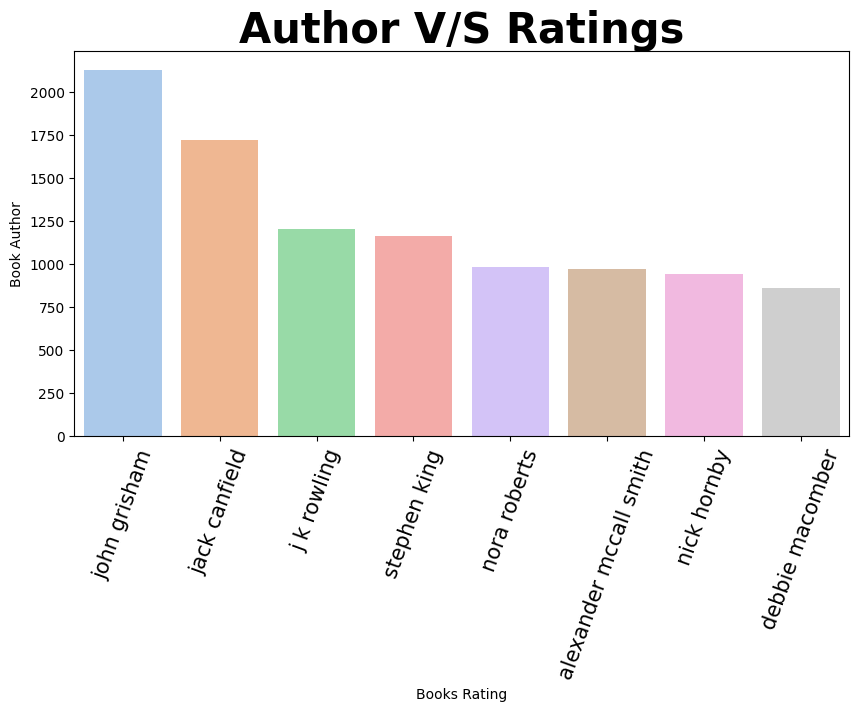

In [85]:
plt.figure(figsize=(10, 5))

# Filter the data for authors with book ratings greater than 3000
filtered_data = author_ratings[author_ratings['book_rating'] > 700]

# Create the bar plot using the x and y keyword arguments
ax5 = sns.barplot(x='mod_book_author', y='book_rating', data=filtered_data,palette='pastel')

# Set the title and adjust the x-axis labels
ax5.set_title('Author V/S Ratings', fontsize=30, fontweight='bold')
ax5.set(xlabel='Books Rating', ylabel='Book Author')
plt.xticks(fontsize=15, rotation=70)

# Display the plot
plt.show()

In [86]:
#check if in the "weird" ages theres actual data 
all_cleaned['age'].unique()

array([42.0, 'unknown', 34.0, 30.0, 24.0, 101.0, 55.0, 38.0, 44.0, 28.0,
       47.0, 33.0, 39.0, 53.0, 57.0, 63.0, 29.0, 32.0, 25.0, 35.0, 23.0,
       31.0, 49.0, 51.0, 26.0, 37.0, 54.0, 58.0, 43.0, 56.0, 36.0, 52.0,
       40.0, 46.0, 27.0, 21.0, 41.0, 17.0, 18.0, 19.0, 50.0, 20.0, 15.0,
       1.0, 59.0, 45.0, 14.0, 103.0, 48.0, 22.0, 62.0, 104.0, 7.0, 72.0,
       16.0, 2.0, 73.0, 60.0, 68.0, 71.0, 64.0, 66.0, 116.0, 61.0, 136.0,
       9.0, 67.0, 3.0, 11.0, 100.0, 209.0, 12.0, 65.0, 239.0, 70.0, 75.0,
       148.0, 76.0, 13.0, 0.0, 74.0, 69.0, 78.0, 8.0, 81.0, 5.0, 82.0,
       80.0, 83.0, 90.0, 79.0, 201.0, 93.0, 140.0, 244.0, 127.0, 4.0,
       141.0, 10.0, 89.0, 92.0, 168.0, 77.0, 199.0, 6.0, 99.0, 84.0,
       128.0, 85.0, 124.0, 200.0, 97.0, 96.0, 204.0, 152.0, 95.0, 108.0,
       228.0, 133.0, 151.0, 220.0, 146.0, 157.0, 132.0, 105.0],
      dtype=object)

In [87]:
print(all_cleaned['age'].dtype)

object


In [88]:
all_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183600 entries, 1 to 350153
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   isbn                 183600 non-null  object  
 1   book_title           183600 non-null  object  
 2   book_author          183600 non-null  object  
 3   year_of_publication  183600 non-null  int64   
 4   publisher            183600 non-null  object  
 5   genre                183600 non-null  object  
 6   user_id              183600 non-null  float64 
 7   book_rating          183600 non-null  float64 
 8   location             183600 non-null  object  
 9   age                  183600 non-null  object  
 10  age_numeric          137577 non-null  float64 
 11  age_bins             183600 non-null  category
 12  mod_book_author      183600 non-null  object  
 13  mod_book_title       183600 non-null  object  
 14  mod_publisher        183600 non-null  object  
dtypes: ca

### Books rating

In [89]:
max_ratings = all_cleaned.groupby('mod_book_title')['book_rating'].max().reset_index()

max_ratings_sorted = max_ratings.sort_values(by='book_rating', ascending=False)

best_books = max_ratings_sorted.iloc[:10]  

print(f"Best Books: {best_books['mod_book_title']}, Rating: {best_books['book_rating']}")

Best Books: 57106    zwlf goldene fden lebensweisheiten einer wunde...
31923    mientras mi preciosa duerme while my pretty on...
31948                                      milch und kohle
8033                         complete book of wedding vows
31942                                                milad
31941                         mil y una noches las editors
31934                     miguel de cervantess don quixote
31926        miffy at the zoo miffy big tent entertainment
31925    mies van der rohe farnsworth house weekend hou...
31924                                     mientras vivimos
Name: mod_book_title, dtype: object, Rating: 57106    10.0
31923    10.0
31948    10.0
8033     10.0
31942    10.0
31941    10.0
31934    10.0
31926    10.0
31925    10.0
31924    10.0
Name: book_rating, dtype: float64


/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/2427748496.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=best_books, x='book_rating', y='mod_book_title', palette='pastel')


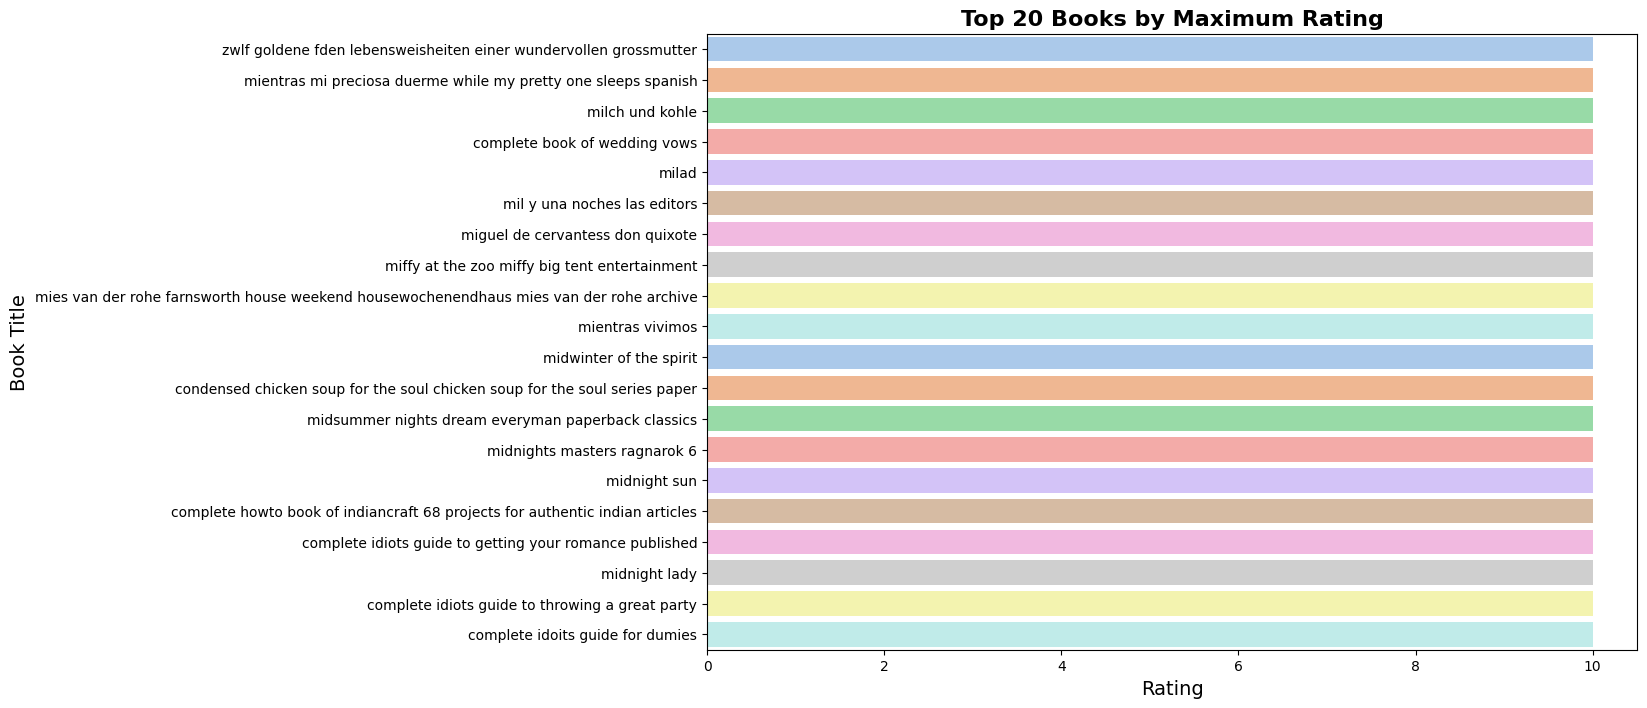

In [90]:
# Step 1: Group by 'mod_book_title' and find the maximum rating
max_ratings = all_cleaned.groupby('mod_book_title')['book_rating'].max().reset_index()

# Step 2: Sort the grouped data by rating in descending order
max_ratings_sorted = max_ratings.sort_values(by='book_rating', ascending=False)

# Step 3: Extract the top 10 books with the highest ratings
best_books = max_ratings_sorted.iloc[:20]

# Step 4: Plot the data
plt.figure(figsize=(12, 8))

# Create a bar plot with book titles and ratings
sns.barplot(data=best_books, x='book_rating', y='mod_book_title', palette='pastel')

# Add titles and labels
plt.title('Top 20 Books by Maximum Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Book Title', fontsize=14)

# Display the plot
plt.show();

In [91]:
# Access the specific row in the DataFrame where 'mod_book_title' matches the given string
specific_row = all_cleaned[all_cleaned['mod_book_title'] == '006781 bk1 gags de boule et bil']

# Display the row
specific_row

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher


In [92]:
# Filter rows where the title contains numbers
rows_with_numbers_before_title = all_cleaned[all_cleaned['mod_book_title'].str.contains(r'^\d+', regex=True)]

# Display the filtered rows
rows_with_numbers_before_title

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher
1316,1578661137,"1,410 Quintessential Quizzes",Minnie Hickman,2004,Galahad,Questions and answers,135908.0,0.0,"palo alto, california, usa",25.0,25.0,Adult,minnie hickman,1410 quintessential quizzes,galahad
1426,1586215981,3rd Degree,James Patterson,2004,Time Warner Audiobooks,"Fiction, Women detectives, Women in the profes...",80234.0,0.0,"riverdale, illinois, usa",unknown,NaN,unknown,james patterson,3rd degree,time warner audiobooks
1427,1586215981,3rd Degree,James Patterson,2004,Time Warner Audiobooks,"Fiction, Women detectives, Women in the profes...",143175.0,9.0,"blythewood, south carolina, usa",28.0,28.0,Adult,james patterson,3rd degree,time warner audiobooks
1428,1586215981,3rd Degree,James Patterson,2004,Time Warner Audiobooks,"Fiction, Women detectives, Women in the profes...",178667.0,0.0,"freehold, new jersey, usa",34.0,34.0,Adult,james patterson,3rd degree,time warner audiobooks
1429,1586215981,3rd Degree,James Patterson,2004,Time Warner Audiobooks,"Fiction, Women detectives, Women in the profes...",205735.0,10.0,"mosinee, wisconsin, usa",26.0,26.0,Adult,james patterson,3rd degree,time warner audiobooks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341620,207036822X,1984,George Orwell,1970,Gallimard French,"futurology, censorship, surveillance, rebels, ...",223386.0,0.0,"paris, ile de france, france",27.0,27.0,Adult,george orwell,1984,gallimard french
341621,207036822X,1984,George Orwell,1970,Gallimard French,"futurology, censorship, surveillance, rebels, ...",259057.0,10.0,"castelldefels, barcelona, spain",15.0,15.0,Teenager,george orwell,1984,gallimard french
341622,207036822X,1984,George Orwell,1970,Gallimard French,"futurology, censorship, surveillance, rebels, ...",263073.0,0.0,"geneva, geneva, switzerland",unknown,NaN,unknown,george orwell,1984,gallimard french
341623,207036822X,1984,George Orwell,1970,Gallimard French,"futurology, censorship, surveillance, rebels, ...",264554.0,0.0,"montreal, quebec, canada",33.0,33.0,Adult,george orwell,1984,gallimard french


In [93]:
all_cleaned.head()

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,16634.0,0.0,"little rock, arkansas, usa",42.0,42.0,Adult,kitty kelley,the royals,bausch lombard
2,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,87141.0,0.0,"huntington beach, california, usa",unknown,NaN,unknown,kitty kelley,the royals,bausch lombard
3,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,169736.0,7.0,"minneapolis, minnesota, usa",34.0,34.0,Adult,kitty kelley,the royals,bausch lombard
4,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,208406.0,0.0,"kansas city, missouri, usa",30.0,30.0,Adult,kitty kelley,the royals,bausch lombard
5,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,230496.0,0.0,"simi valley, california, usa",34.0,34.0,Adult,kitty kelley,the royals,bausch lombard


In [94]:
all_cleaned.genre[all_cleaned["genre"] == "unknown"].count()

31229

In [95]:
all_cleaned.genre[all_cleaned["genre"] != "unknown"].count()

152371

### Rating by location

In [96]:
all_cleaned['location'].nunique()

12942

In [97]:
# Identify rows with multiple consecutive spaces in the 'location' column
weird_spacing = all_cleaned[all_cleaned['location'].str.contains(r'\s{2,}', regex=True)]

# Also, identify rows with leading or trailing spaces in the 'location' column
leading_trailing_spaces = all_cleaned[all_cleaned['location'].str.contains(r'^\s+|\s+$', regex=True)]

# Combine both conditions
weird_location_data = pd.concat([weird_spacing, leading_trailing_spaces]).drop_duplicates()

# Display the rows with weird spacing
print(weird_location_data[['location']])

                                             location
3271                         elk  city, oklahoma, usa
9246    brington  huntington, england, united kingdom
9859                         elk  city, oklahoma, usa
15115                 san  francisco, california, usa
20127                       telde, las  palmas, spain
20346                       telde, las  palmas, spain
26996                        elk  city, oklahoma, usa
29965              north  plainfield, new jersey, usa
31951                        elk  city, oklahoma, usa
32475                      yellow  springs, ohio, usa
39568                        elk  city, oklahoma, usa
40135                       telde, las  palmas, spain
60556                     albairate  mi, italy, italy
63515                   saint  charles, missouri, usa
68270        turlock and  santa cruz, california, usa
75961                        elk  city, oklahoma, usa
80474                        elk  city, oklahoma, usa
98490                       

In [99]:
def clean_location_spacing(df, column_name):
    """
    Clean weird spacing in the specified location column of the DataFrame.
    
    This function:
    1. Strips leading and trailing spaces.
    2. Replaces multiple spaces between words with a single space.
    3. Ensures that "City, State, Country" format is preserved.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the location data.
    - column_name (str): The name of the column to be cleaned.
    
    Returns:
    - pd.DataFrame: The DataFrame with the cleaned location column.
    """
    # Step 1: Remove leading and trailing spaces
    df[column_name] = df[column_name].str.strip()
    
    # Step 2: Replace multiple spaces with a single space
    df[column_name] = df[column_name].str.replace(r'\s+', ' ', regex=True)
    
    # Step 3: Ensure proper spacing around commas (",")
    df[column_name] = df[column_name].str.replace(r'\s*,\s*', ', ', regex=True)
    
    return df

# Apply the function to the 'location' column
all_cleaned = clean_location_spacing(all_cleaned, 'location')

# Display the cleaned locations
print(all_cleaned['location'].head())

1           little rock, arkansas, usa
2    huntington beach, california, usa
3          minneapolis, minnesota, usa
4           kansas city, missouri, usa
5         simi valley, california, usa
Name: location, dtype: object


In [100]:
location_rating = all_cleaned.groupby('location')['book_rating'].max().reset_index()
sorted_location_rating = location_rating.sort_values(by = 'book_rating', ascending=False)
highest_rating_location = sorted_location_rating.iloc[:20]
print(f"Best Books: {highest_rating_location['location']}, Rating: {best_books['book_rating']}")

Best Books: 9985             salt lake city, utah, usa
2740                  crawford, texas, usa
11873               verona, wisconsin, usa
5461         jefferson city, missouri, usa
2707             council bluffs, iowa, usa
2708           coupeville, washington, usa
5460                jeferson, georgia, usa
8662      palm beach gardens, florida, usa
5457                javea, alicante, spain
5456                 jasper, missouri, usa
5455                  jasper, indiana, usa
2717     coventry, england, united kingdom
2718           coventry, rhode island, usa
8005               newark, california, usa
2720               covina, california, usa
11866             vernon, connecticut, usa
5450                  japser, florida, usa
2724              covington, virginia, usa
5449            janesville, wisconsin, usa
2726          cow capital, alberta, canada
Name: location, dtype: object, Rating: 57106    10.0
31923    10.0
31948    10.0
8033     10.0
31942    10.0
31941    10.0
31934

/var/folders/8g/lrm1jqjj24lclps7299c4ndw0000gn/T/ipykernel_21555/91742061.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_rating_location, x='book_rating', y='location', palette='pastel')


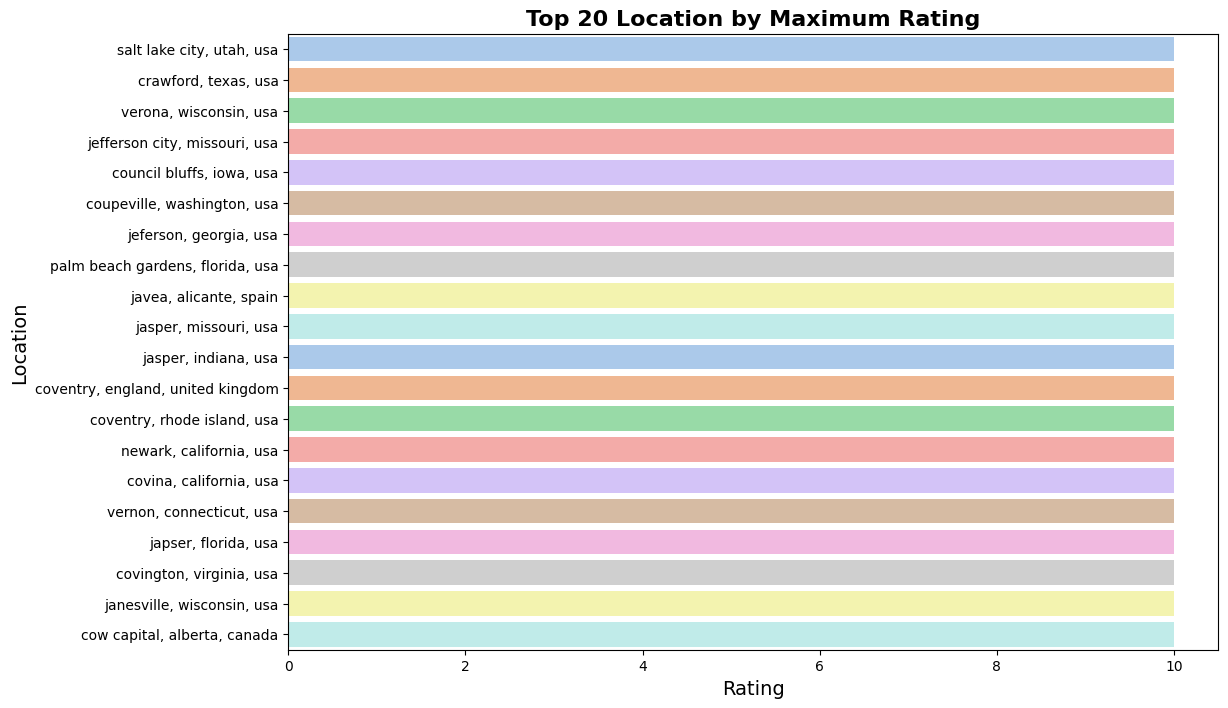

In [103]:
#Plot the data
plt.figure(figsize=(12, 8))

sns.barplot(data=highest_rating_location, x='book_rating', y='location', palette='pastel')

# Add titles and labels
plt.title('Top 20 Location by Maximum Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Location', fontsize=14)

# Display the plot
plt.show();

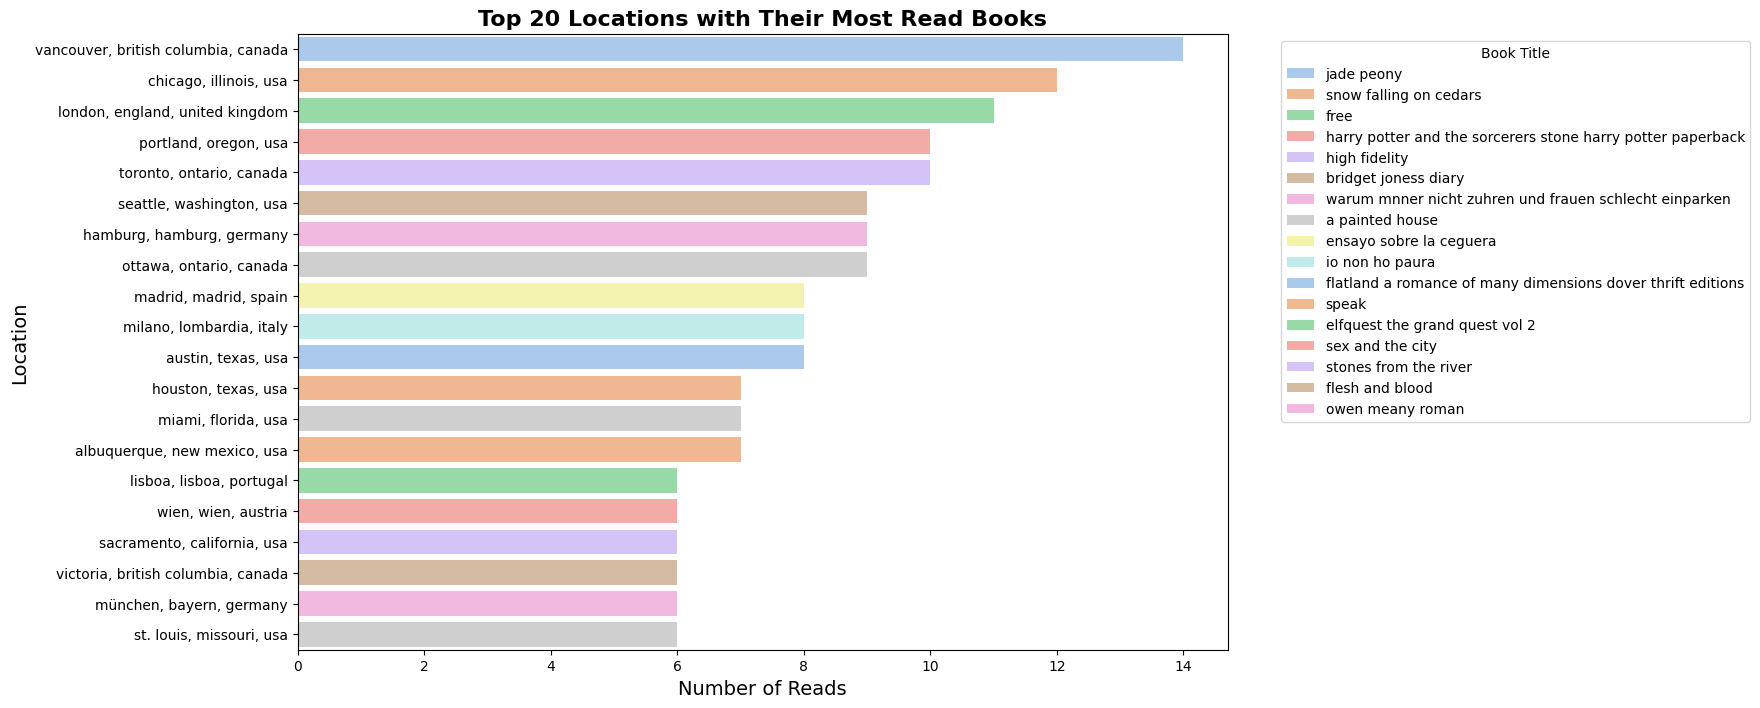

In [104]:
# Step 1: Count the number of times each book has been read in each location
location_book_count = all_cleaned.groupby(['location', 'mod_book_title']).size().reset_index(name='read_count')

# Step 2: Identify the most read book for each location
most_read_books_per_location = location_book_count.loc[location_book_count.groupby('location')['read_count'].idxmax()]

# Step 3: Sort by the number of reads in descending order and select the top 20 locations
top_most_read_books = most_read_books_per_location.sort_values(by='read_count', ascending=False).iloc[:20]

# Step 4: Plot the data
plt.figure(figsize=(12, 8))

# Create a barplot showing the most read books by location
sns.barplot(
    data=top_most_read_books,
    x='read_count',
    y='location',
    hue='mod_book_title',
    dodge=False,
    palette='pastel'
)

# Set the title and labels
plt.title('Top 20 Locations with Their Most Read Books', fontsize=16, fontweight='bold')
plt.xlabel('Number of Reads', fontsize=14)
plt.ylabel('Location', fontsize=14)

# Adjust legend
plt.legend(title='Book Title', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

### Most read book by country 

In [105]:
all_cleaned['location']

1                  little rock, arkansas, usa
2           huntington beach, california, usa
3                 minneapolis, minnesota, usa
4                  kansas city, missouri, usa
5                simi valley, california, usa
                         ...                 
350138                       fayetteville, , 
350143                  greenhills, ohio, usa
350151             escondido, california, usa
350152         niagara falls, ontario, canada
350153    coquitlam, british columbia, canada
Name: location, Length: 183600, dtype: object

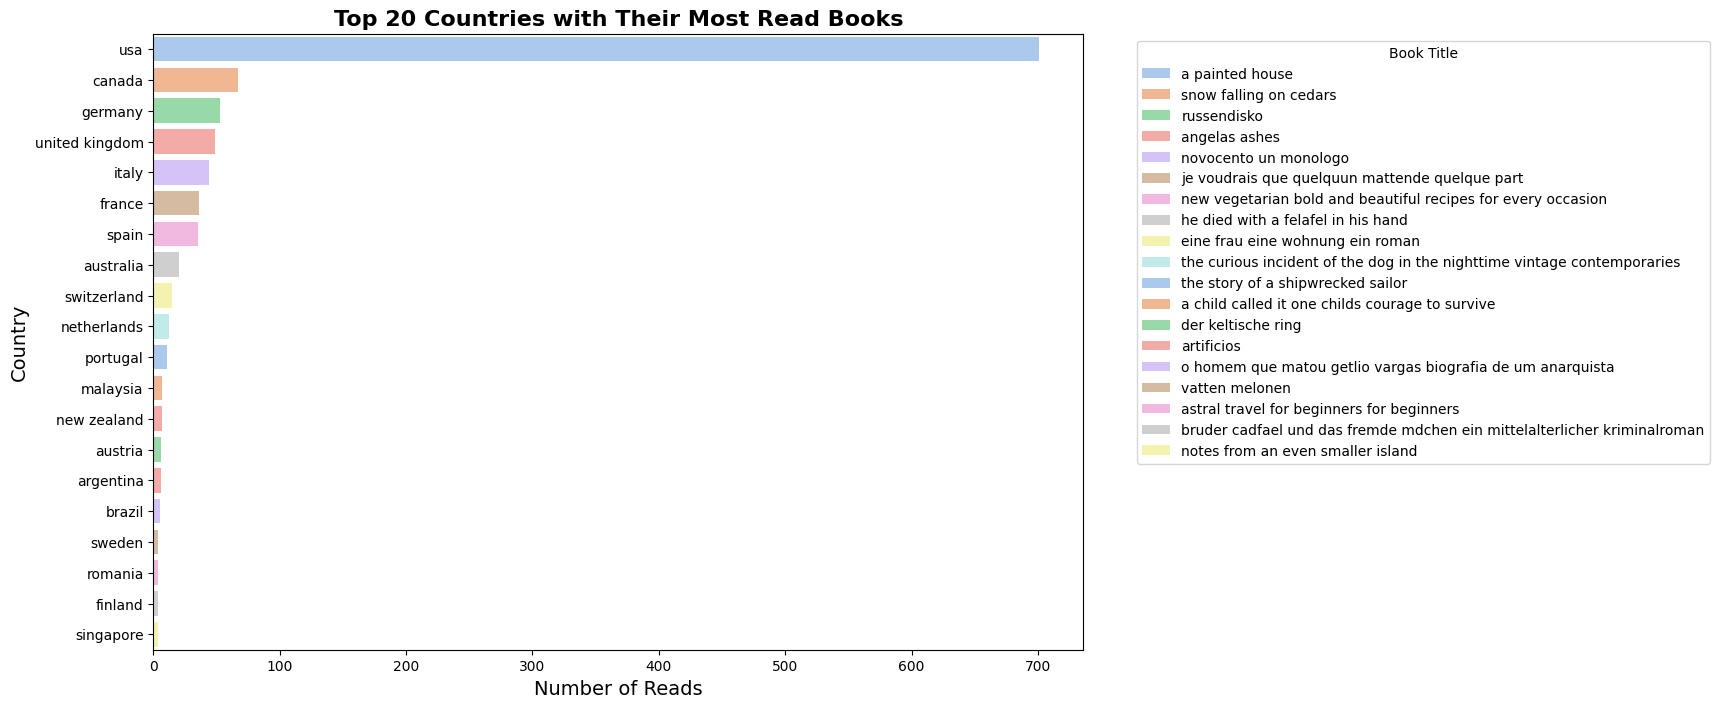

In [106]:
# Step 1: Extract country information from the 'location' column
# Assuming the format is "City, State, Country" or "City, Country"
all_cleaned['country'] = all_cleaned['location'].apply(lambda x: x.split(',')[-1].strip())
all_cleaned['country'] = all_cleaned['country'].replace('n/a',np.nan,regex = True)
all_cleaned['country'] = all_cleaned['country'].replace('',np.nan,regex = True)

# Step 2: Count the number of times each book has been read in each country
country_book_count = all_cleaned.groupby(['country', 'mod_book_title']).size().reset_index(name='read_count')

# Step 3: Identify the most read book for each country
most_read_books_per_country = country_book_count.loc[country_book_count.groupby('country')['read_count'].idxmax()]

# Step 4: Sort by the number of reads in descending order and select the top 20 countries
top_most_read_books = most_read_books_per_country.sort_values(by='read_count', ascending=False).iloc[:20]

# Step 5: Plot the data
plt.figure(figsize=(12, 8))

# Create a barplot showing the most read books by country
sns.barplot(
    data=top_most_read_books,
    x='read_count',
    y='country',
    hue='mod_book_title',
    dodge=False,
    palette='pastel'
)

# Set the title and labels
plt.title('Top 20 Countries with Their Most Read Books', fontsize=16, fontweight='bold')
plt.xlabel('Number of Reads', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Adjust legend
plt.legend(title='Book Title', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [107]:
all_cleaned.head()

,isbn,book_title,book_author,year_of_publication,publisher,genre,user_id,book_rating,location,age,age_numeric,age_bins,mod_book_author,mod_book_title,mod_publisher,country
1,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,16634.0,0.0,"little rock, arkansas, usa",42.0,42.0,Adult,kitty kelley,the royals,bausch lombard,usa
2,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,87141.0,0.0,"huntington beach, california, usa",unknown,NaN,unknown,kitty kelley,the royals,bausch lombard,usa
3,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,169736.0,7.0,"minneapolis, minnesota, usa",34.0,34.0,Adult,kitty kelley,the royals,bausch lombard,usa
4,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,208406.0,0.0,"kansas city, missouri, usa",30.0,30.0,Adult,kitty kelley,the royals,bausch lombard,usa
5,068160204X,The Royals,Kitty Kelley,2020,Bausch & Lombard,unknown,230496.0,0.0,"simi valley, california, usa",34.0,34.0,Adult,kitty kelley,the royals,bausch lombard,usa


In [108]:
all_cleaned.nunique()

isbn                   59938
book_title             57691
book_author            33850
year_of_publication       83
publisher               8286
genre                  34925
user_id                37203
book_rating               11
location               12933
age                      125
age_numeric              124
age_bins                   6
mod_book_author        33200
mod_book_title         57107
mod_publisher           8058
country                  186
dtype: int64

In [109]:
# Access the specific row in the DataFrame where 'mod_book_title' matches the given string
most_read_book = all_cleaned[
    (all_cleaned['mod_book_title'] == 'wild animus') & 
    (all_cleaned['book_rating'] > 5)
]
# Display the row
most_read_book.count()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
genre                  0
user_id                0
book_rating            0
location               0
age                    0
age_numeric            0
age_bins               0
mod_book_author        0
mod_book_title         0
mod_publisher          0
country                0
dtype: int64

### Most read books by country 

In [110]:
def get_top_n_books_by_country(df, country_name, n=10):
    """
    Get the top 'n' most read books for a specified country from the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing book reading data.
    - country_name (str): The name of the country to filter the books.
    - n (int): The number of top books to return. Default is 10.

    Returns:
    - pd.DataFrame: A DataFrame with the top 'n' most read books for the specified country.
    """
    # Step 1: Extract country information from the 'location' column
    df['country'] = df['location'].apply(lambda x: x.split(',')[-1].strip())

    # Step 2: Filter the dataset to include only entries where the country matches the specified country
    country_books = df[df['country'].str.lower() == country_name.lower()]

    # Step 3: Group by 'mod_book_title' to count the number of reads in the specified country
    book_count = country_books.groupby('mod_book_title').size().reset_index(name='read_count')

    # Step 4: Sort the books by their read count in descending order
    sorted_books = book_count.sort_values(by='read_count', ascending=False)

    # Step 5: Select the top 'n' most read books
    top_n_books = sorted_books.head(n)

    return top_n_books

top_10_books_germany = get_top_n_books_by_country(all_cleaned, 'Germany', n=10)

print("Top 10 Most Read Books in Germany:")
print(top_10_books_germany.head(10))

Top 10 Most Read Books in Germany:
                                         mod_book_title  read_count
6682                                        russendisko          53
2184                                       der vorleser          50
7239  stupid white men eine abrechnung mit dem ameri...          48
4822                                         illuminati          45
4235                    generation golf eine inspektion          43
5392                               lauf jane lauf roman          42
6030                                 mrder ohne gesicht          40
2971                                         die ppstin          39
1304            das parfum die geschichte eines morders          38
1742                             der hahn ist tot roman          37


In [111]:
top_10_books_france = get_top_n_books_by_country(all_cleaned, 'France', n=10)

print("Top 10 Most Read Books in France:")
print(top_10_books_france)

Top 10 Most Read Books in France:
                                      mod_book_title  read_count
1016  je voudrais que quelquun mattende quelque part          36
1338                               la nuit des temps          27
1978                le parfum histoire dun meurtrier          26
715         et si cetait vrai if this were only true          24
3310                                          ravage          22
2196                                lecume des jours          21
386                                   comme un roman          20
2381                                     les fourmis          20
3498                         stupeur et tremblements          20
742                  extension du domain de la lutte          19


### Random Book recommendation 

In [112]:
def get_random_book_recommendations(df, num_recommendations=20):
    """
    Get a specified number of random book recommendations from the DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing book data.
    - num_recommendations (int): The number of random book recommendations to generate. Default is 20.
    
    Returns:
    - pd.DataFrame: A DataFrame containing the randomly selected book recommendations.
    """
    # Ensure that the number of recommendations does not exceed the number of available books
    num_recommendations = min(num_recommendations, len(df))
    
    # Select random books from the DataFrame
    random_books = df.sample(n=num_recommendations)  # random_state ensures reproducibility
    
    return random_books

# Example usage
random_recommendations = get_random_book_recommendations(all_cleaned, num_recommendations=20)

# Display the recommendations
random_recommendations[['mod_book_title', 'book_author', 'book_rating']]

,mod_book_title,book_author,book_rating
341445,les contes du chat perche,Marcel Ayme,0.0
15019,herzsprung,Ildiko Kurthy,0.0
66987,introducing psychology,Nigel C. Benson,0.0
88004,new vegetarian bold and beautiful recipes for ...,Celia Brooks Brown,0.0
25670,larbre de nol,Michel Bataille,0.0
47465,about a boy,Nick Hornby,8.0
20884,onze minutes,Paulo Coelho,3.0
348115,bourne identity,Robert Ludlum,8.0
90648,tipping the velvet,Sarah Waters,8.0
318414,night mare 06,Piers Anthony,7.0


In [113]:
# Step 1: Group by 'user_id' and count the number of ratings
user_rating_counts = all_cleaned.groupby('user_id')['book_rating'].count()

# Step 2: Filter users who have rated more than 100 books
users_with_100_plus_ratings = user_rating_counts[user_rating_counts > 10].index

# Step 3: Store the user_ids in a variable
filtered_user_ids = users_with_100_plus_ratings.tolist()

# Display the filtered user_ids
len(filtered_user_ids)

2926

In [114]:
user_rating_counts.describe()

count    37203.000000
mean         4.935086
std         23.220768
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       2703.000000
Name: book_rating, dtype: float64

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(all_cleaned['mod_publisher'])
tfidf = vectorizer.fit_transform(all_cleaned['mod_book_author'])
tfidf = vectorizer.fit_transform(all_cleaned['mod_book_title'])


In [116]:
from sklearn.metrics.pairwise import cosine_similarity


In [117]:
# Filter the original DataFrame to include only the filtered users
filtered_data = all_cleaned[all_cleaned['user_id'].isin(filtered_user_ids)]

# Create the user-item matrix for the filtered users
user_item_matrix_filtered = filtered_data.pivot_table(index='user_id', columns='mod_book_title', values='book_rating').fillna(0)

# Display the user-item matrix for filtered users
print(user_item_matrix_filtered.head())

mod_book_title  1 2 3  10 000 dreams interpreted  \
user_id                                            
242.0             0.0                        0.0   
254.0             0.0                        0.0   
392.0             0.0                        0.0   
507.0             0.0                        0.0   
625.0             0.0                        0.0   

mod_book_title  1000 years 1000 people ranking the men and women who shaped the millennium  \
user_id                                                                                      
242.0                                                         0.0                            
254.0                                                         0.0                            
392.0                                                         0.0                            
507.0                                                         0.0                            
625.0                                                         0.0      

In [118]:
# Calculate cosine similarity between users
user_similarity_filtered = cosine_similarity(user_item_matrix_filtered)

# Convert to a DataFrame for easier interpretation
user_similarity_filtered_df = pd.DataFrame(user_similarity_filtered, index=user_item_matrix_filtered.index, columns=user_item_matrix_filtered.index)

# Display the user-user similarity matrix for filtered users
print(user_similarity_filtered_df.head())

user_id  242.0     254.0     392.0     507.0     625.0     643.0     850.0     \
user_id                                                                         
242.0         1.0       0.0       0.0       0.0       0.0       0.0       0.0   
254.0         0.0       1.0       0.0       0.0       0.0       0.0       0.0   
392.0         0.0       0.0       1.0       0.0       0.0       0.0       0.0   
507.0         0.0       0.0       0.0       1.0       0.0       0.0       0.0   
625.0         0.0       0.0       0.0       0.0       1.0       0.0       0.0   

user_id  882.0     914.0     1211.0    ...  277195.0  277427.0  277478.0  \
user_id                                ...                                 
242.0         0.0       0.0       0.0  ...       0.0       0.0       0.0   
254.0         0.0       0.0       0.0  ...       0.0       0.0       0.0   
392.0         0.0       0.0       0.0  ...       0.0       0.0       0.0   
507.0         0.0       0.0       0.0  ...       0.0

In [119]:
len(user_similarity_filtered_df.index)

2926

In [120]:
user_similarity_filtered_df.head()

user_id,242.0,254.0,392.0,507.0,625.0,643.0,850.0,882.0,914.0,1211.0,...,277195.0,277427.0,277478.0,277639.0,277681.0,278137.0,278144.0,278188.0,278418.0,278563.0
user_id,,,,,,,,,,,,,,,,,,,,,
242.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
625.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
user_similarity_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2926 entries, 242.0 to 278563.0
Columns: 2926 entries, 242.0 to 278563.0
dtypes: float64(2926)
memory usage: 65.4 MB


In [122]:
# Find similar users to a given user_id (e.g., user_id=392)
similar_users = user_similarity_filtered_df.loc[392.0].sort_values(ascending=False)

# Display the top 5 most similar users
print(similar_users.head(5))

user_id
392.0       1.000000
135241.0    0.146657
242.0       0.000000
182442.0    0.000000
181948.0    0.000000
Name: 392.0, dtype: float64


In [123]:
# # Calculate cosine similarity between books
# item_similarity_filtered = cosine_similarity(user_item_matrix_filtered.T)

# # Convert to a DataFrame for easier interpretation
# item_similarity_filtered_df = pd.DataFrame(item_similarity_filtered, index=user_item_matrix_filtered.columns, columns=user_item_matrix_filtered.columns)

# # Display the item-item similarity matrix for filtered users
# print(item_similarity_filtered_df.head())

In [124]:
# # Find similar books to a given book_id (e.g., book_id=123)
# similar_books_filtered = item_similarity_filtered_df[123].sort_values(ascending=False)

# # Display the top 5 most similar books
# print(similar_books_filtered.head(5))